In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap


In [154]:
!pip install transformers

In [155]:
pd.set_option('display.max_columns', 40)

In [156]:
df1 = pd.read_csv('/content/drive/MyDrive/DATA SETS/United Airlines/Inflight Service_Inventory data.csv') #only for business/first class
df2 = pd.read_csv('/content/drive/MyDrive/DATA SETS/United Airlines/Inflight Service_Pre order data.csv') #J business , Y Economy
df3 = pd.read_csv('/content/drive/MyDrive/DATA SETS/United Airlines/Survey data _Customer comments.csv') # seat factor band is - %of seats filled (groups)
df4 = pd.read_csv('/content/drive/MyDrive/DATA SETS/United Airlines/Survey data_Inflight Satisfaction Score.csv')

In [157]:
df1

flight_number departure_station_code arrival_station_code  \
0               2634                    IAX                  PDX   
1               2666                    ORX                  IAX   
2               2310                    DEX                  SAX   
3               1712                    SFX                  CLX   
4               1225                    LAX                  HNX   
...              ...                    ...                  ...   
61262            711                    ORX                  AUX   
61263           1914                    IAX                  LAX   
61264           1417                    IAX                  LAX   
61265           1005                    LAX                  ITX   
61266            583                    YYX                  SFX   

      scheduled_departure_dtl  entree_product_id  \
0                    9/1/2022              58019   
1                    9/1/2022              60549   
2                    9/2/2022              58981   
3                    9/4/2022              58764   
4                    9/8/2022              60549   
...                       ...                ...   
61262               9/20/2022              61524   
61263               9/30/2022              61360   
61264               9/23/2022              60987   
61265               9/30/2022              54759   
61266               9/20/2022              45351   

                      entree_description entree_code  planned_entree_count  \
0                         Belgium waffle          WF                    20   
1      Vegetarian chili and polenta cake           V                     3   
2                         Scrambled eggs           O                     9   
3             Mediterranean Falafel Bowl           V                     1   
4      Vegetarian chili and polenta cake           V                     1   
...                                  ...         ...                   ...   
61262                     Scrambled eggs           O                     6   
61263               Brioche cheeseburger           B                     3   
61264           Impossible Meatball Bowl           V                     6   
61265              Seared beef short rib           B                     6   
61266                   Teriyaki chicken           C                    10   

       consumed_entree_count  
0                         32  
1                          0  
2                          7  
3                          0  
4                          0  
...                      ...  
61262                      5  
61263                      0  
61264                      5  
61265                      0  
61266                      6  

[61267 rows x 9 columns]

In [158]:
df2

flight_number departure_station_code arrival_station_code  \
0                1423                    INX                  DEX   
1                1620                    IAX                  CUX   
2                1852                    ORX                  PDX   
3                 548                    IAX                  SFX   
4                1155                    IAX                  CUX   
...               ...                    ...                  ...   
212034           2189                    DEX                  FLX   
212035           1618                    LAX                  ORX   
212036           1498                    SFX                  IAX   
212037           1830                    EWX                  SFX   
212038           2237                    ORX                  DEX   

       record_locator carrier_code scheduled_departure_dtl cabin_code  \
0              B3XX1H           UA                9/1/2022          J   
1              BFXXJC           UA                9/2/2022          J   
2              DPXX2H           UA                9/2/2022          J   
3              ELXX8H           UA                9/2/2022          J   
4              NCXX4S           UA                9/2/2022          J   
...               ...          ...                     ...        ...   
212034         PDXXCY           UA               9/14/2022          Y   
212035         KZXXFK           UA               9/14/2022          Y   
212036         O3XX7J           UA               9/11/2022          Y   
212037         BQXXYW           UA               9/14/2022          Y   
212038         FJXX14           UA               9/30/2022          J   

                        meal_group       meal_category  \
0                      ENTREES HOT             POULTRY   
1                      ENTREES HOT           BREAKFAST   
2                      ENTREES HOT           BREAKFAST   
3                      ENTREES HOT           BREAKFAST   
4                      ENTREES HOT           BREAKFAST   
...                            ...                 ...   
212034  UNITED CATERER OWNED 88-3F              SNACKS   
212035                         NaN                 NaN   
212036           ALCOHOL BEVERAGES  GENERIC INT WINE A   
212037                      LIQUOR              LIQUOR   
212038                 ENTREES HOT             POULTRY   

                                   meal_short_description  \
0       Za'atar chicken with spinach, roasted peppers,...   
1                               Tomato and kale baked egg   
2                               Tomato and kale baked egg   
3                                          Scrambled eggs   
4                                          Belgium waffle   
...                                                   ...   
212034                  SkinnyDipped® Lemon Bliss Almonds   
212035                                     Sparkling Wine   
212036                                           Red Wine   
212037                                      Buffalo Trace   
212038                                    Za’atar chicken   

                                         meal_description is_entree  \
0       Za'atar chicken with spinach, roasted peppers,...         Y   
1       Tomato and kale baked egg with fire roasted re...         Y   
2       Tomato and kale baked egg with fire roasted re...         Y   
3              Scrambled eggs with ham, onion and peppers         Y   
4       Belgium waffle with bourbon banana fosters sau...         Y   
...                                                   ...       ...   
212034                                                NaN         N   
212035                                                NaN       NaN   
212036                                     Red Wine 187ml         N   
212037                                                NaN         N   
212038                                                NaN         Y   

        pre_order_q

In [159]:
df3.head()

flight_number origin_station_code destination_station_code  \
0            950                 LHX                      SFX   
1            950                 LHX                      SFX   
2           1876                 FLX                      EWX   
3           5469                 SFX                      SEX   
4            281                 DEX                      ANX   

  scheduled_departure_date arrival_delay_group departure_delay_group  \
0               2022-09-01      Early & Ontime               Delayed   
1               2022-09-01      Early & Ontime               Delayed   
2               2022-09-01      Early & Ontime        Early & Ontime   
3               2022-09-01      Early & Ontime        Early & Ontime   
4               2022-09-01      Early & Ontime        Early & Ontime   

     entity                                      verbatim_text  \
0  Atlantic  There was no salad dressing. The staff informe...   
1  Atlantic                                      Not a choice.   
2  Domestic                    More variety and bigger snacks.   
3  Domestic  Serving pretzels and cookies in first class wa...   
4  Domestic  More inflight selections to purchase for full ...   

  seat_factor_band                                 ques_verbatim_text  \
0          0 to 70  Is there anything else you'd like to share abo...   
1          0 to 70  Is there anything else you'd like to share abo...   
2              90+  Is there anything else you'd like to share abo...   
3              90+  Is there anything else you'd like to share abo...   
4          0 to 70  Is there anything else you'd like to share abo...   

  loyalty_program_level fleet_type_description fleet_usage response_group  
0             non-elite               B777-200    Mainline         member  
1                   NaN               B777-200    Mainline     non-member  
2             non-elite               A320-200    Mainline         member  
3          premier gold                ERJ-175     Express         member  
4             non-elite              B737-MAX8    Mainline         member

In [160]:
df4

flight_number origin_station_code destination_station_code  \
0               3802                 MKX                      ORX   
1               4645                 COX                      DEX   
2               5236                 COX                      DEX   
3               4686                 DEX                      COX   
4                671                 DEX                      COX   
...              ...                 ...                      ...   
47069              2                 SFX                      SIX   
47070              2                 SFX                      SIX   
47071              3                 SIX                      SFX   
47072              3                 SIX                      SFX   
47073              2                 SFX                      SIX   

      record_locator scheduled_departure_date  \
0             CYXXJJ                 9/1/2022   
1             DRXXMH                 9/1/2022   
2             DEXXS1                 9/1/2022   
3             PXXXLH                 9/1/2022   
4             KZXXH5                 9/1/2022   
...              ...                      ...   
47069         IPXXM3                9/30/2022   
47070         O5XXK4                9/30/2022   
47071         G8XX3W                9/30/2022   
47072         G8XX3W                9/30/2022   
47073         O5XXK4                9/30/2022   

                                           question_text           score  \
0      How satisfied were you with the food & beverag...               2   
1      How satisfied were you with the food & beverag...               5   
2      How satisfied were you with the food & beverag...               5   
3      How satisfied were you with the food & beverag...               3   
4      How satisfied were you with the food & beverag...               5   
...                                                  ...             ...   
47069  How satisfied were you with the food & beverag...               4   
47070  How satisfied were you with the food & beverag...               4   
47071  How satisfied were you with the food & beverag...               1   
47072                          What item did you choose?  chicken entrée   
47073                          What item did you choose?  chicken entrée   

      satisfaction_type driver_sub_group1               driver_sub_group2  \
0          Dissatisfied   food & beverage  food and beverage satisfaction   
1             Satisfied   food & beverage  food and beverage satisfaction   
2             Satisfied   food & beverage  food and beverage satisfaction   
3          Dissatisfied   food & beverage  food and beverage satisfaction   
4             Satisfied   food & beverage  food and beverage satisfaction   
...                 ...               ...                             ...   
47069         Satisfied   food & beverage  food and beverage satisfaction   
47070         Satisfied   food & beverage  food and beverage satisfaction   
47071      Dissatisfied   food & beverage  food and beverage satisfaction   
47072               NaN   food & beverage                            comp   
47073               NaN   food & beverage                            comp   

       arrival_delay_minutes arrival_delay_group cabin_code_desc cabin_name  \
0                        -24      Early & Ontime         Economy    Economy   
1                         10             Delayed        Business        NaN   
2                         -8      Early & Ontime        Business        NaN   
3                        -11      Early & Ontime         Economy    Economy   
4                         18             Delayed        Business        NaN   
...                      ...                 ...             ...        ...   
47069                    -16      Early & Ontime         Economy    Economy   
47070                    -16      Early & Ontime         Economy    Economy   
47071                     18            

In [161]:
df4.rename(columns = {'origin_station_code' : 'departure_station_code' ,'destination_station_code' : 'arrival_station_code' , 'scheduled_departure_date' : 'scheduled_departure_dtl' } , inplace = True)

***ANALYSIS 1 - Inflight Satisfaction + Pre-order data***

In [162]:
merged_df = df2.merge(df4, on=['flight_number', 'departure_station_code', 'arrival_station_code', 'record_locator','scheduled_departure_dtl'], how='inner')
sorted_df = merged_df.sort_values(by=['flight_number', 'departure_station_code', 'arrival_station_code', 'record_locator', 'scheduled_departure_dtl'])

In [163]:
sorted_df['score'] = pd.to_numeric(merged_df['score'], errors='coerce')

In [164]:
sorted_df = sorted_df.dropna(subset=['score'], how='any' )

In [165]:
df_on_board_deciders = sorted_df[sorted_df['meal_group'].isnull()]

In [166]:
sorted_df.dropna(subset=['meal_group'], how='any', inplace = True)

In [167]:
sorted_df.drop(['carrier_code' ,  'driver_sub_group2' , 'driver_sub_group1' , 'cabin_name' ,'fleet_usage' ,'equipment_type_code' , 'ua_uax', 'departure_gate' , 'arrival_gate' ] , axis =1 , inplace = True)

In [168]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2897 entries, 2773 to 5115
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   flight_number                     2897 non-null   int64  
 1   departure_station_code            2897 non-null   object 
 2   arrival_station_code              2897 non-null   object 
 3   record_locator                    2897 non-null   object 
 4   scheduled_departure_dtl           2897 non-null   object 
 5   cabin_code                        2897 non-null   object 
 6   meal_group                        2897 non-null   object 
 7   meal_category                     2897 non-null   object 
 8   meal_short_description            2897 non-null   object 
 9   meal_description                  2063 non-null   object 
 10  is_entree                         2897 non-null   object 
 11  pre_order_qty                     2897 non-null   int64  
 12  que

In [169]:
sorted_df['meal_category'].value_counts()

BREAKFAST             720
POULTRY               707
VEGETARIAN            492
BEEF/VEAL             431
SNACKS                372
LIQUOR                 50
GENERIC INT WINE A     35
BEER                   26
PASTA                  25
SEAFOOD                16
CHEESE                 16
PORK                    3
VARIETY                 2
SANDWICH                1
DINNER                  1
Name: meal_category, dtype: int64

In [170]:
sorted_df

flight_number departure_station_code arrival_station_code  \
2773              5                    LHX                  IAX   
5037             13                    ZRX                  ORX   
4577             19                    MXX                  EWX   
4579             19                    MXX                  EWX   
3994             21                    IAX                  AMX   
...             ...                    ...                  ...   
2510           2682                    DEX                  SFX   
2366           2683                    IAX                  DCX   
3425           2684                    ORX                  SAX   
3427           2684                    ORX                  SAX   
5115           2684                    ORX                  SAX   

     record_locator scheduled_departure_dtl cabin_code   meal_group  \
2773         EGXXZV               9/20/2022          J  ENTREES HOT   
5037         AKXXL4               9/20/2022          J  ENTREES HOT   
4577         PFXXDB               9/20/2022          J  ENTREES HOT   
4579         PFXXDB               9/20/2022          J  ENTREES HOT   
3994         B0XX6J               9/20/2022          J  ENTREES HOT   
...             ...                     ...        ...          ...   
2510         M9XX4S                9/1/2022          Y       LIQUOR   
2366         F9XX17                9/5/2022          J  ENTREES HOT   
3425         FHXXR4               9/28/2022          J  ENTREES HOT   
3427         FHXXR4               9/28/2022          J  ENTREES HOT   
5115         GGXXDV                9/2/2022          J  ENTREES HOT   

     meal_category                             meal_short_description  \
2773         PASTA             Ricotta and mushroom filled tortellini   
5037         PASTA             Ricotta and mushroom filled tortellini   
4577       SEAFOOD                                Black halibut filet   
4579          PORK                                         Pork Coppa   
3994       SEAFOOD                           Seared turbot fish filet   
...            ...                                                ...   
2510        LIQUOR                                        Bacardi Rum   
2366       POULTRY                                    Za’atar chicken   
3425       POULTRY  Za'atar chicken with spinach, roasted peppers,...   
3427     BEEF/VEAL                               Brioche cheeseburger   
5115     BEEF/VEAL                               Brioche cheeseburger   

                                       meal_description is_entree  \
2773  Ricotta and mushroom filled tortellini pesto r...         Y   
5037  Ricotta and mushroom filled tortellini pesto r...         Y   
4577  Black halibut filet  with Vizcaina sauce, grat...         Y   
4579  Pork Coppa  with Carolina vinegar sauce, chili...         Y   
3994  Seared turbot fish filet with maltaise sauce, ...         Y   
...                                                 ...       ...   
2510                                                NaN         N   
2366                                                NaN         Y   
3425  Za'atar chicken with spinach, roasted peppers,...         Y   
3427                   Brioche burger with bistro sauce         Y   
5115                   Brioche burger with bistro sauce         Y   

      pre_order_qty                                      question_text  score  \
2773              1  How satisfied were you with the food & beverag...    2.0   
5037              1  How satisfied were you with the food & beverag...    1.0   
4577              2  How satisfied were you with the food & beverag...    5.0   
4579              1  How satisfied were you with the food & beverag...    5.0   
3994              1  How satisfied were you with the food & beverag...    1.0   
...             ...                                                ...    ...   
2510              1  How satisfied were you with the food & beverag...    4

HUB-SPOKE ANALYSIS

1. SPOKE

In [171]:
df_spoke = sorted_df[sorted_df['hub_spoke'] == 'spoke departure']

In [172]:
df_spoke.describe(include = 'all')

flight_number departure_station_code arrival_station_code  \
count     1016.000000                   1016                 1016   
unique            NaN                     81                    6   
top               NaN                    MCX                  DEX   
freq              NaN                     70                  266   
mean      1420.856299                    NaN                  NaN   
std        731.012182                    NaN                  NaN   
min          5.000000                    NaN                  NaN   
25%        713.000000                    NaN                  NaN   
50%       1556.000000                    NaN                  NaN   
75%       2058.000000                    NaN                  NaN   
max       2655.000000                    NaN                  NaN   

       record_locator scheduled_departure_dtl cabin_code   meal_group  \
count            1016                    1016       1016         1016   
unique            849                      30          2            7   
top            F5XXG0               9/20/2022          J  ENTREES HOT   
freq                5                      72        863          845   
mean              NaN                     NaN        NaN          NaN   
std               NaN                     NaN        NaN          NaN   
min               NaN                     NaN        NaN          NaN   
25%               NaN                     NaN        NaN          NaN   
50%               NaN                     NaN        NaN          NaN   
75%               NaN                     NaN        NaN          NaN   
max               NaN                     NaN        NaN          NaN   

       meal_category meal_short_description  \
count           1016                   1016   
unique            14                     45   
top          POULTRY        Za’atar chicken   
freq             427                    239   
mean             NaN                    NaN   
std              NaN                    NaN   
min              NaN                    NaN   
25%              NaN                    NaN   
50%              NaN                    NaN   
75%              NaN                    NaN   
max              NaN                    NaN   

                                  meal_description is_entree  pre_order_qty  \
count                                          642      1016    1016.000000   
unique                                          38         2            NaN   
top     Scrambled eggs with ham, onion and peppers         Y            NaN   
freq                                           101       863            NaN   
mean                                           NaN       NaN       1.606299   
std                                            NaN       NaN       1.167929   
min                                            NaN       NaN       1.000000   
25%                                            NaN       NaN       1.000000   
50%                                            NaN       NaN       1.000000   
75%                                            NaN       NaN       2.000000   
max                                            NaN       NaN      18.000000   

                                            question_text        score  \
count                                                1016  1016.000000   
unique                                                  1          NaN   
top     How satisfied were you with the food & beverag...          NaN   
freq                                                 1016          NaN   
mean                                                  NaN     2.967520   
std                                                   NaN     1.522226   
min                                                   NaN     1.000000   
25%                                                   NaN     2.000000   
50%                                                   NaN     3.000000   
75%                                             

In [173]:
df_spoke['meal_group'].value_counts()

ENTREES HOT                   845
UNITED CATERER OWNED 88-3F    135
ENTREES COLD                   17
LIQUOR                         10
ALCOHOL BEVERAGES               6
BEER                            2
SANDWICHES                      1
Name: meal_group, dtype: int64

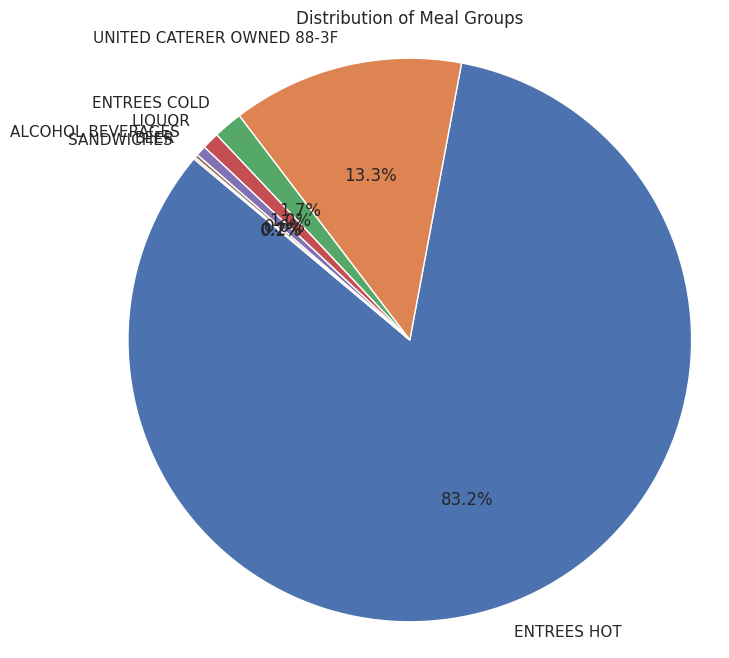

In [174]:
value_counts = df_spoke['meal_group'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=140)
plt.title("Distribution of Meal Groups")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [175]:
categorical_columns = ['meal_group', 'meal_category', 'meal_short_description', 'meal_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a bar plot of score vs. the categorical column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='score', data=df_spoke)
    plt.title(f"Score vs {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

<ipython-input-175-99d0f306aa04>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


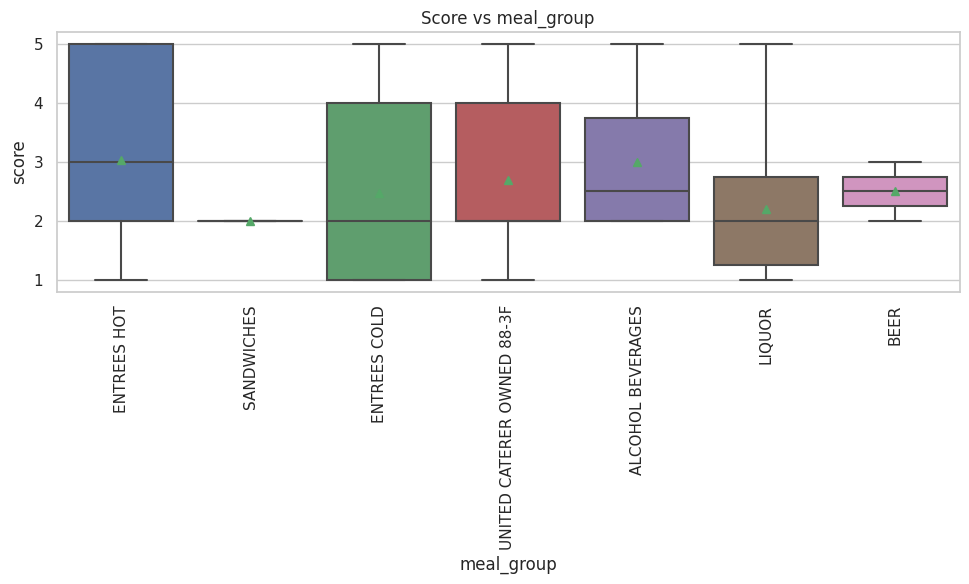

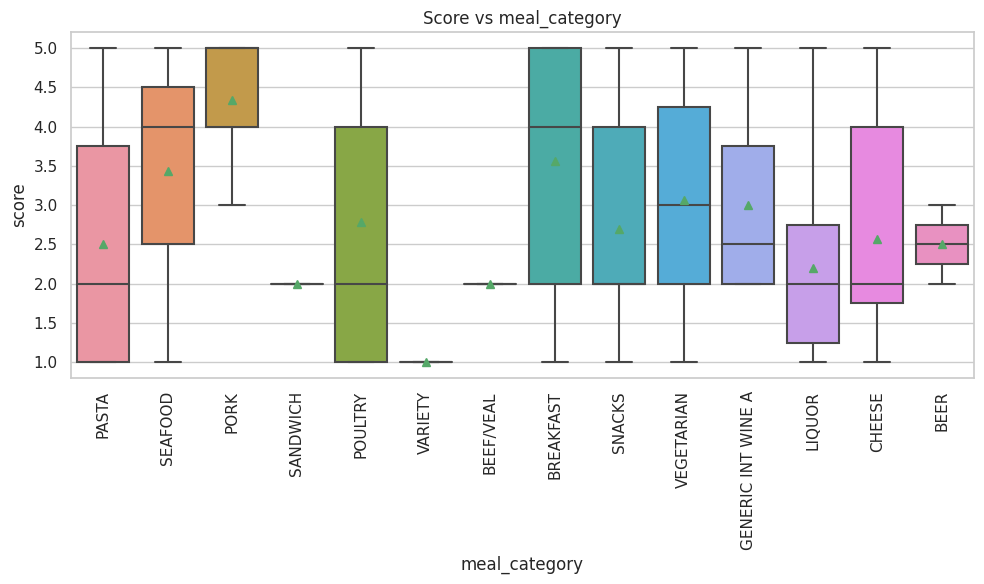

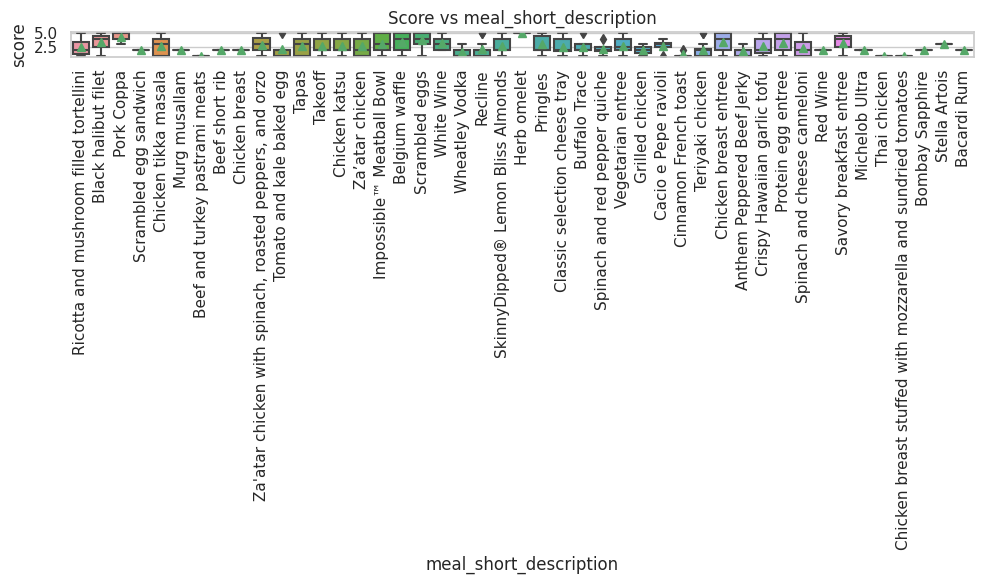

<ipython-input-176-5dd89000c6b5>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


In [176]:
categorical_columns = ['meal_group', 'meal_category', 'meal_short_description', 'meal_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a bar plot of score vs. the categorical column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='score', data=df_spoke , showmeans=True)
    plt.title(f"Score vs {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [177]:
df_spoke_beer = df_spoke[df_spoke['meal_group'] == 'BEER']

In [178]:
df_spoke_beer['meal_short_description'].value_counts()

Michelob Ultra    1
Stella Artois     1
Name: meal_short_description, dtype: int64

In [179]:
df_spoke_entree_hot = df_spoke[df_spoke['meal_group'] == 'ENTREES HOT']

In [180]:
df_spoke_entree_hot['meal_category'].value_counts()

POULTRY       427
BREAKFAST     201
VEGETARIAN    184
PASTA          22
SEAFOOD         7
PORK            3
BEEF/VEAL       1
Name: meal_category, dtype: int64

<ipython-input-181-cc8b0e3da1f7>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


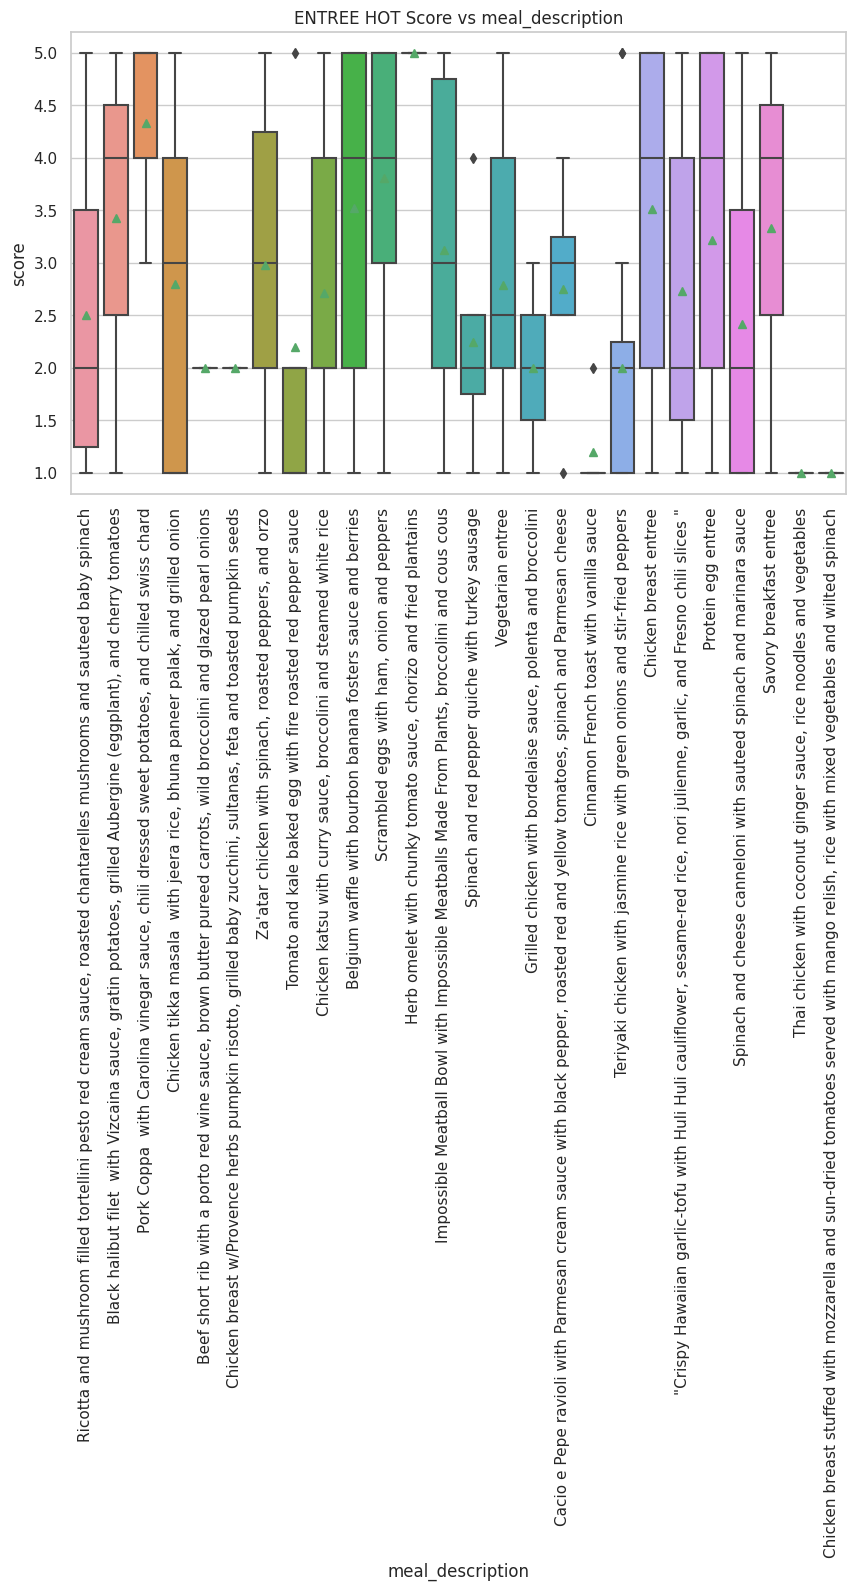

In [181]:
categorical_columns = ['meal_category', 'meal_short_description', 'meal_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a bar plot of score vs. the categorical column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='score', data=df_spoke_entree_hot , showmeans=True)
    plt.title(f"ENTREE HOT Score vs {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [182]:
df_spoke_entree_hot_pasta = df_spoke_entree_hot[df_spoke_entree_hot['meal_category'] == 'PASTA']

In [183]:
categorical_columns = ['meal_short_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a box plot of score vs. the categorical column with mean displayed
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x=column, y='score', data=df_spoke_entree_hot_pasta, showmeans=True)  # Set showmeans to True
    plt.title(f"PASTA Score vs {column} (with Mean)")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [184]:
df_spoke_entree_hot_poultry = df_spoke_entree_hot[df_spoke_entree_hot['meal_category'] == 'POULTRY']

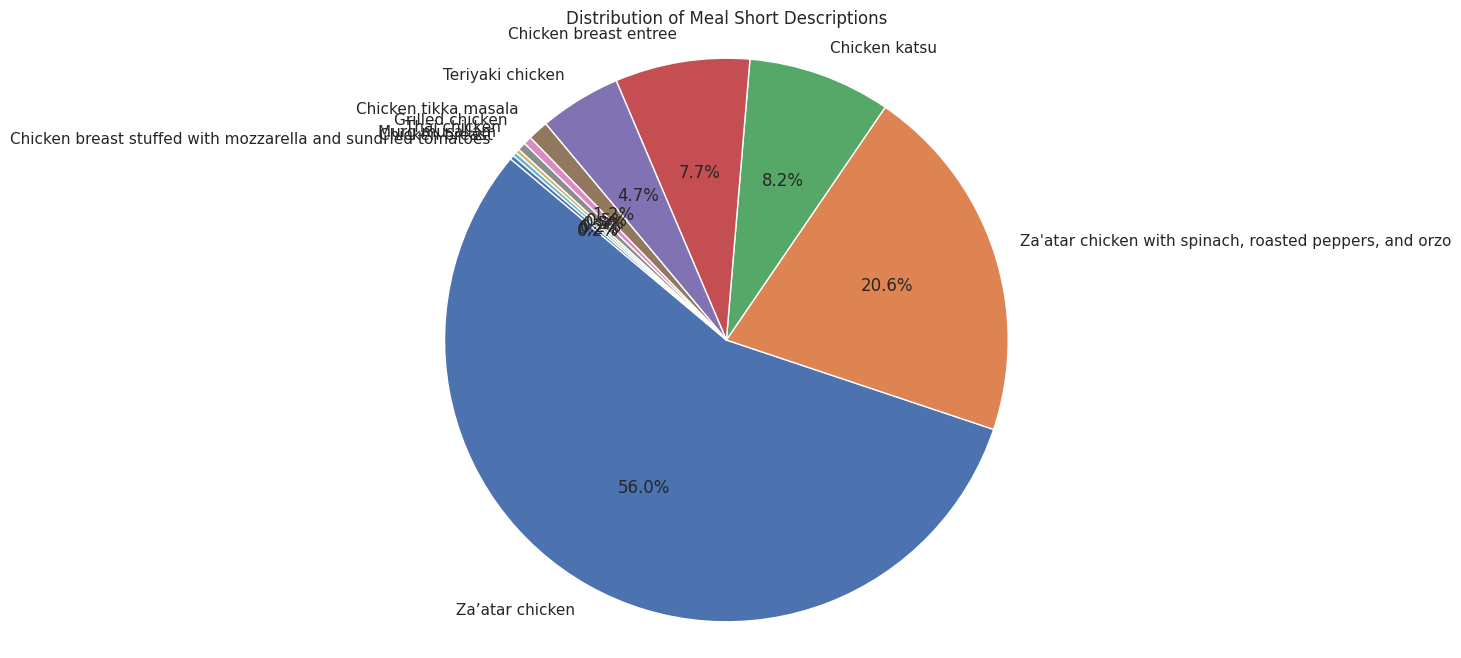

In [185]:
value_counts = df_spoke_entree_hot_poultry['meal_short_description'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=140)
plt.title("Distribution of Meal Short Descriptions")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

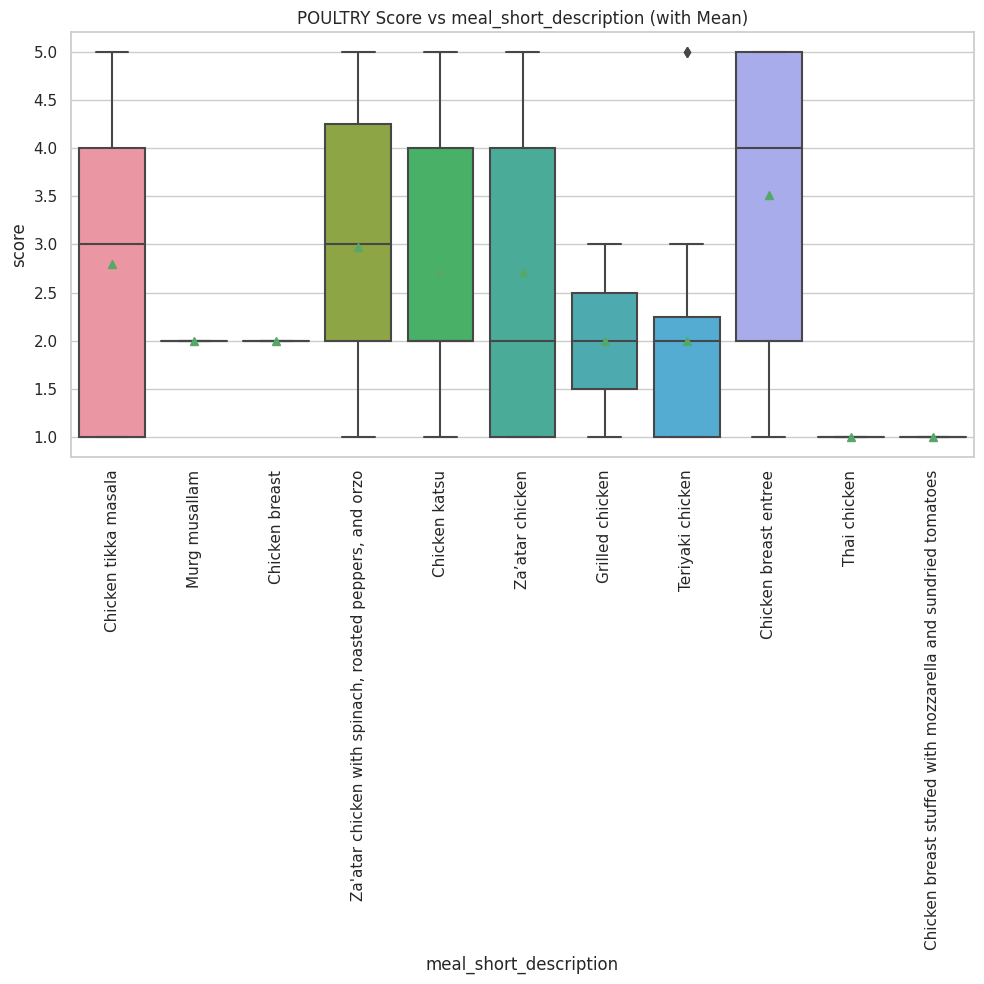

In [186]:
sns.set(style="whitegrid")

categorical_columns = ['meal_short_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a box plot of score vs. the categorical column with mean displayed
    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(x=column, y='score', data=df_spoke_entree_hot_poultry, showmeans=True)  # Set showmeans to True
    plt.title(f"POULTRY Score vs {column} (with Mean)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [187]:
df_spoke_entree_hot_veg = df_spoke_entree_hot[df_spoke_entree_hot['meal_category'] == 'VEGETARIAN']

In [188]:
value_counts = df_spoke_entree_hot_veg['meal_short_description'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=140)
plt.title("Distribution of Meal Short Descriptions")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

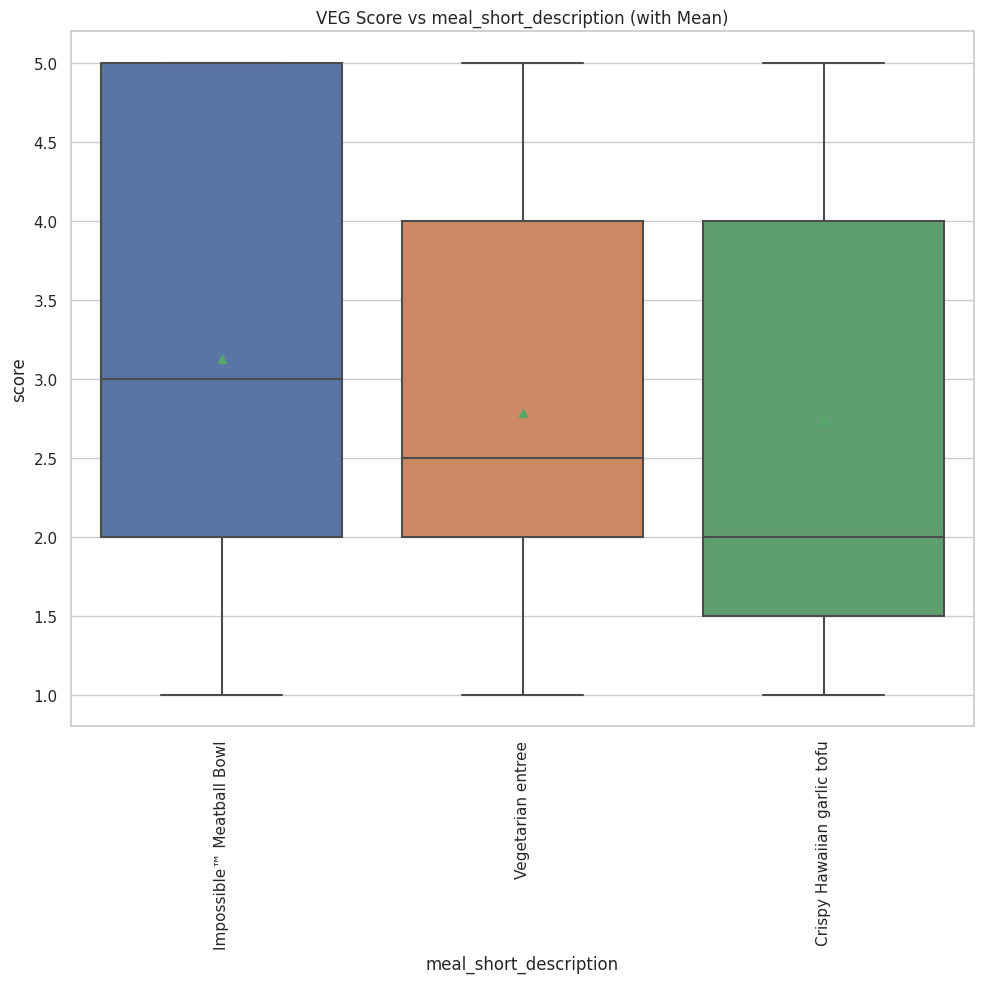

In [189]:
categorical_columns = ['meal_short_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a box plot of score vs. the categorical column with mean displayed
    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(x=column, y='score', data=df_spoke_entree_hot_veg, showmeans=True)  # Set showmeans to True
    plt.title(f"VEG Score vs {column} (with Mean)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [190]:
df_spoke_entree_hot_brekfst = df_spoke_entree_hot[df_spoke_entree_hot['meal_category'] == 'BREAKFAST']

In [191]:
value_counts = df_spoke_entree_hot_brekfst['meal_short_description'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=140)
plt.title("Distribution of Meal Short Descriptions")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

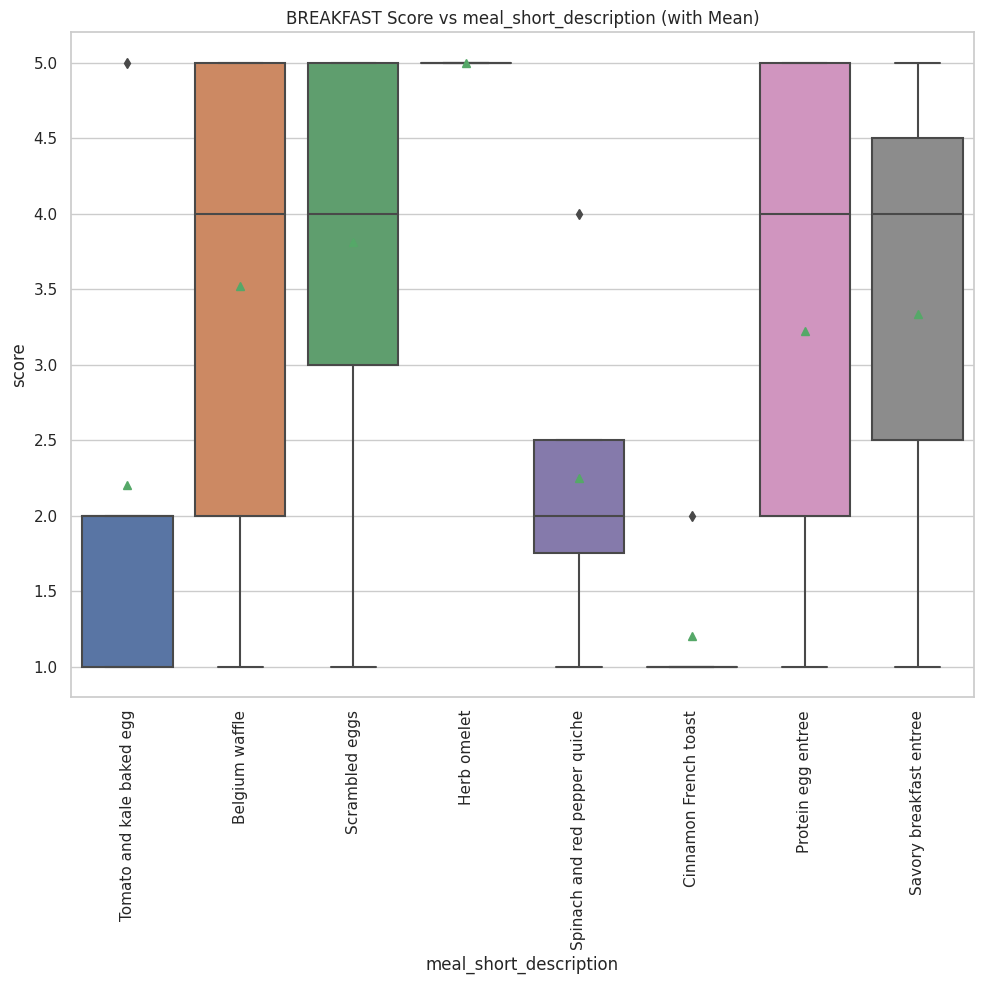

In [192]:
categorical_columns = ['meal_short_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a box plot of score vs. the categorical column with mean displayed
    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(x=column, y='score', data=df_spoke_entree_hot_brekfst, showmeans=True)  # Set showmeans to True
    plt.title(f"BREAKFAST Score vs {column} (with Mean)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [193]:
df_spoke_united = df_spoke[df_spoke['meal_group'] == 'UNITED CATERER OWNED 88-3F']

In [194]:
df_spoke_united['meal_short_description'].value_counts()

Takeoff                              60
Tapas                                41
Recline                              13
SkinnyDipped® Lemon Bliss Almonds     9
Pringles                              7
Anthem Peppered Beef Jerky            5
Name: meal_short_description, dtype: int64

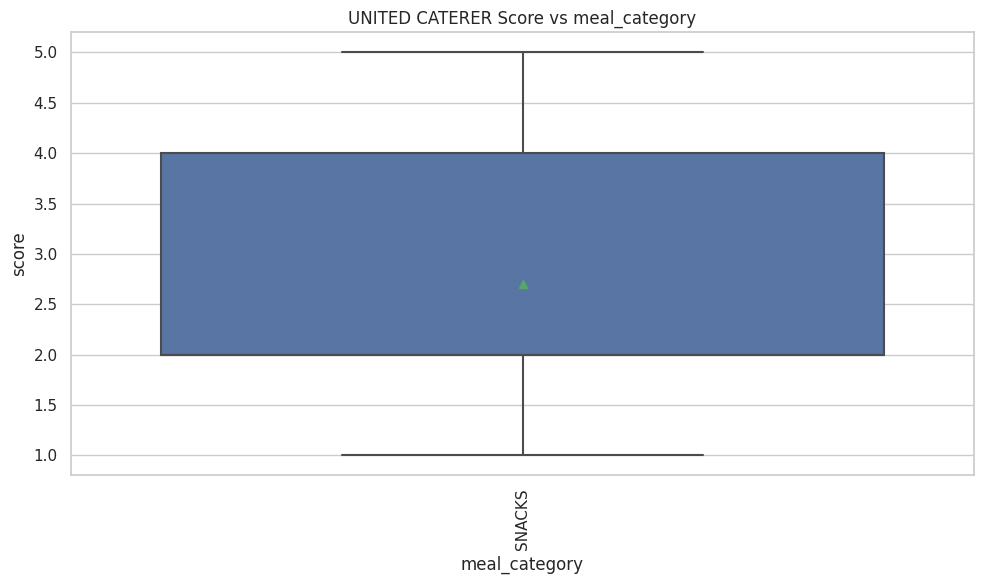

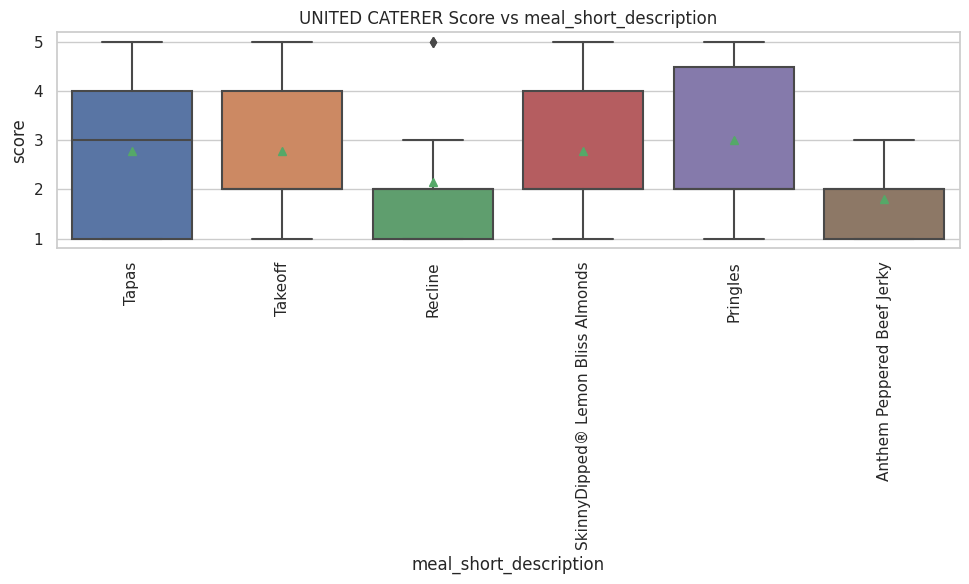

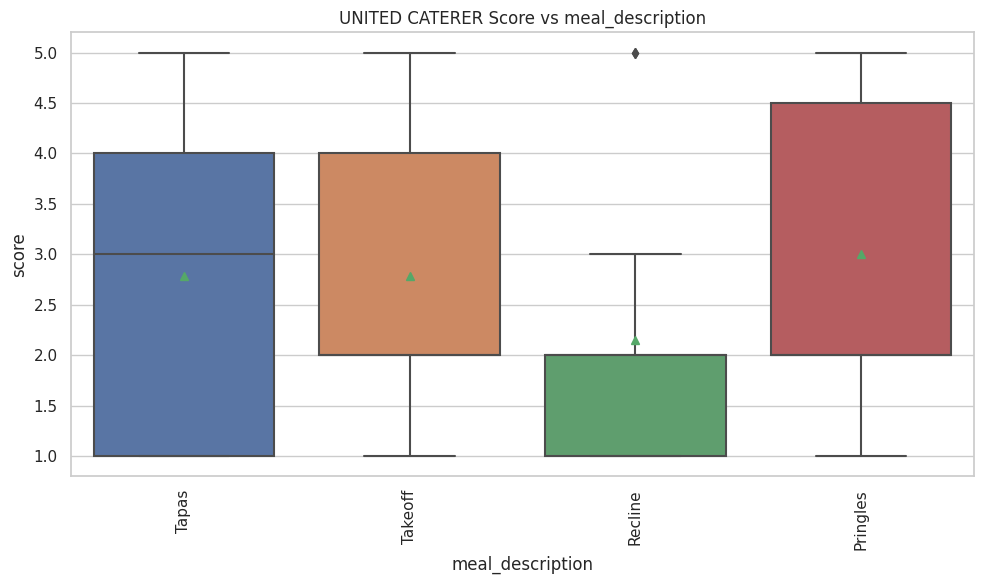

In [195]:
categorical_columns = ['meal_category', 'meal_short_description', 'meal_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a bar plot of score vs. the categorical column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='score', data=df_spoke_united , showmeans=True)
    plt.title(f"UNITED CATERER Score vs {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [196]:
df_spoke_ent_cold = df_spoke[df_spoke['meal_group'] == 'ENTREES COLD']

In [197]:
df_spoke_ent_cold['meal_short_description'].value_counts()

Classic selection cheese tray     16
Beef and turkey pastrami meats     1
Name: meal_short_description, dtype: int64

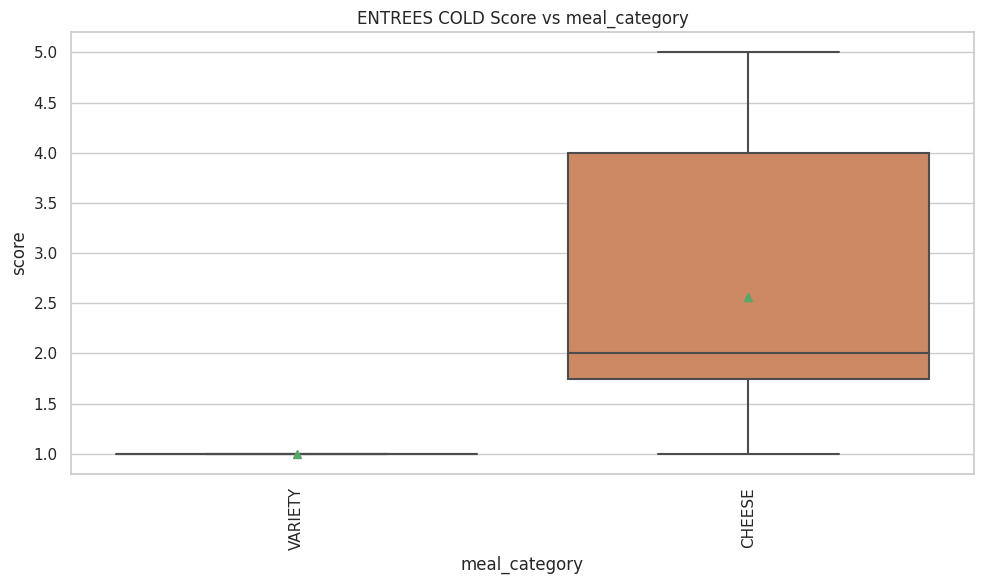

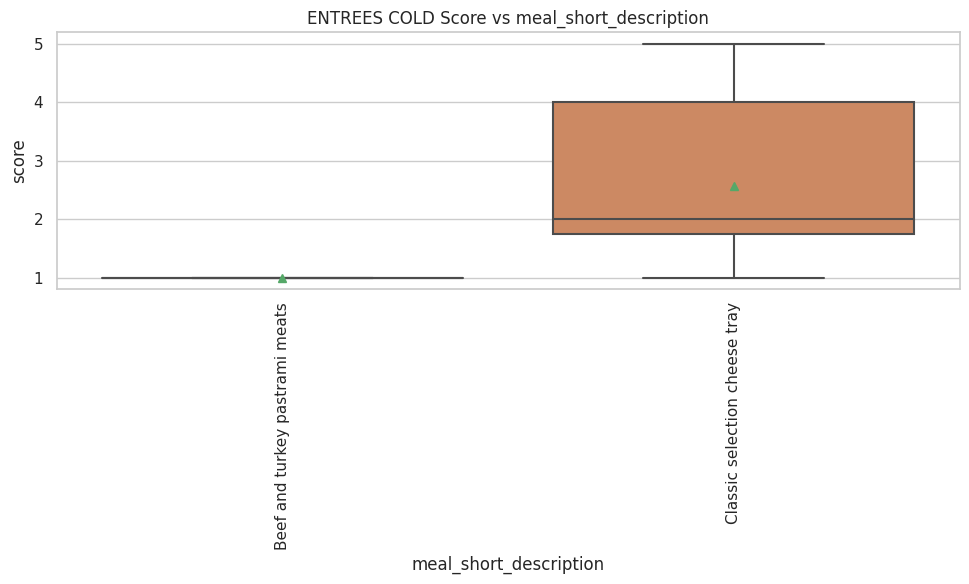

<ipython-input-198-372da39c1d20>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


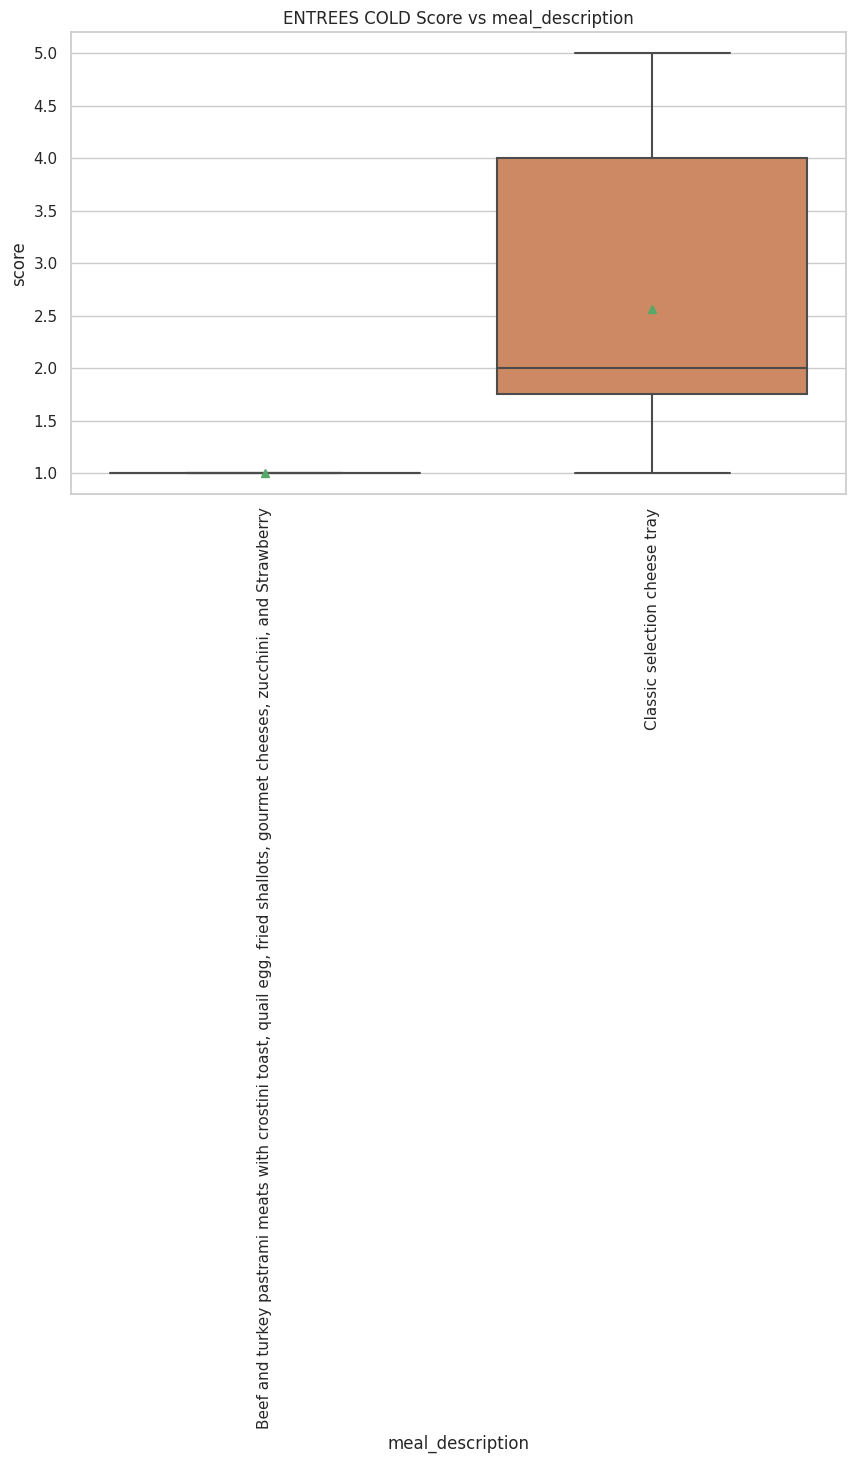

In [198]:
categorical_columns = ['meal_category', 'meal_short_description', 'meal_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a bar plot of score vs. the categorical column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='score', data=df_spoke_ent_cold , showmeans=True)
    plt.title(f"ENTREES COLD Score vs {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

2. HUB

In [199]:
df_hub = sorted_df[sorted_df['hub_spoke'] == 'hub departure']

In [200]:
df_hub.describe(include = 'all')

flight_number departure_station_code arrival_station_code  \
count     1881.000000                   1881                 1881   
unique            NaN                      6                   87   
top               NaN                    IAX                  IAX   
freq              NaN                    462                  141   
mean      1446.730994                    NaN                  NaN   
std        719.941384                    NaN                  NaN   
min         21.000000                    NaN                  NaN   
25%        754.000000                    NaN                  NaN   
50%       1537.000000                    NaN                  NaN   
75%       2044.000000                    NaN                  NaN   
max       2684.000000                    NaN                  NaN   

       record_locator scheduled_departure_dtl cabin_code   meal_group  \
count            1881                    1881       1881         1881   
unique           1398                      30          2            6   
top            EQXXJX               9/10/2022          J  ENTREES HOT   
freq                6                     104       1551         1550   
mean              NaN                     NaN        NaN          NaN   
std               NaN                     NaN        NaN          NaN   
min               NaN                     NaN        NaN          NaN   
25%               NaN                     NaN        NaN          NaN   
50%               NaN                     NaN        NaN          NaN   
75%               NaN                     NaN        NaN          NaN   
max               NaN                     NaN        NaN          NaN   

       meal_category meal_short_description                  meal_description  \
count           1881                   1881                              1421   
unique            12                     42                                36   
top        BREAKFAST   Brioche cheeseburger  Brioche burger with bistro sauce   
freq             519                    404                               404   
mean             NaN                    NaN                               NaN   
std              NaN                    NaN                               NaN   
min              NaN                    NaN                               NaN   
25%              NaN                    NaN                               NaN   
50%              NaN                    NaN                               NaN   
75%              NaN                    NaN                               NaN   
max              NaN                    NaN                               NaN   

       is_entree  pre_order_qty  \
count       1881    1881.000000   
unique         2            NaN   
top            Y            NaN   
freq        1551            NaN   
mean         NaN       1.459862   
std          NaN       1.153445   
min          NaN       1.000000   
25%          NaN       1.000000   
50%          NaN       1.000000   
75%          NaN       2.000000   
max          NaN      32.000000   

                                            question_text        score  \
count                                                1881  1881.000000   
unique                                                  1          NaN   
top     How satisfied were you with the food & beverag...          NaN   
freq                                                 1881          NaN   
mean                                                  NaN     3.280170   
std                                                   NaN     1.534246   
min                                                   NaN     1.000000   
25%                                                   NaN     2.000000   
50%                                                   NaN     4.000000   
75%                                                   NaN     5.000000   
max                                                   NaN     5.000000   

       satisfaction

In [201]:
df_hub['meal_group'].value_counts()

ENTREES HOT                   1550
UNITED CATERER OWNED 88-3F     237
LIQUOR                          40
ALCOHOL BEVERAGES               29
BEER                            24
ENTREES COLD                     1
Name: meal_group, dtype: int64

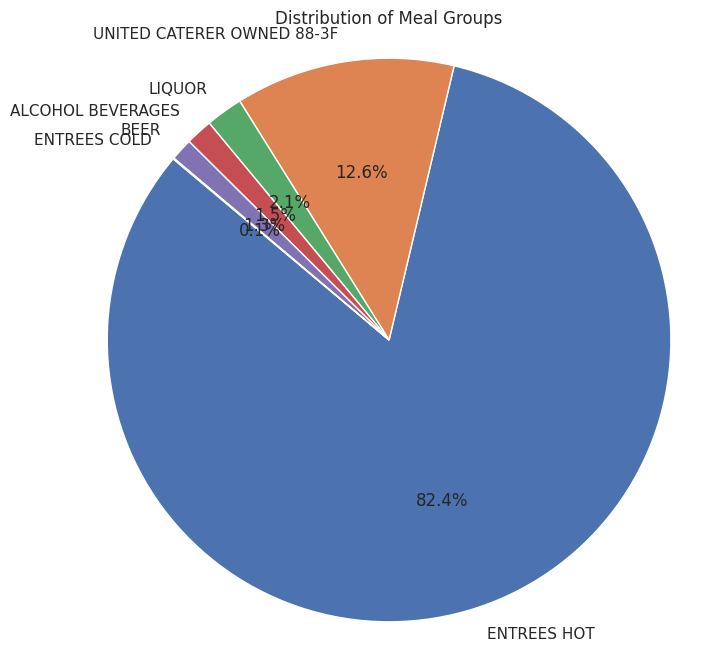

In [202]:
value_counts = df_hub['meal_group'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=140)
plt.title("Distribution of Meal Groups")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

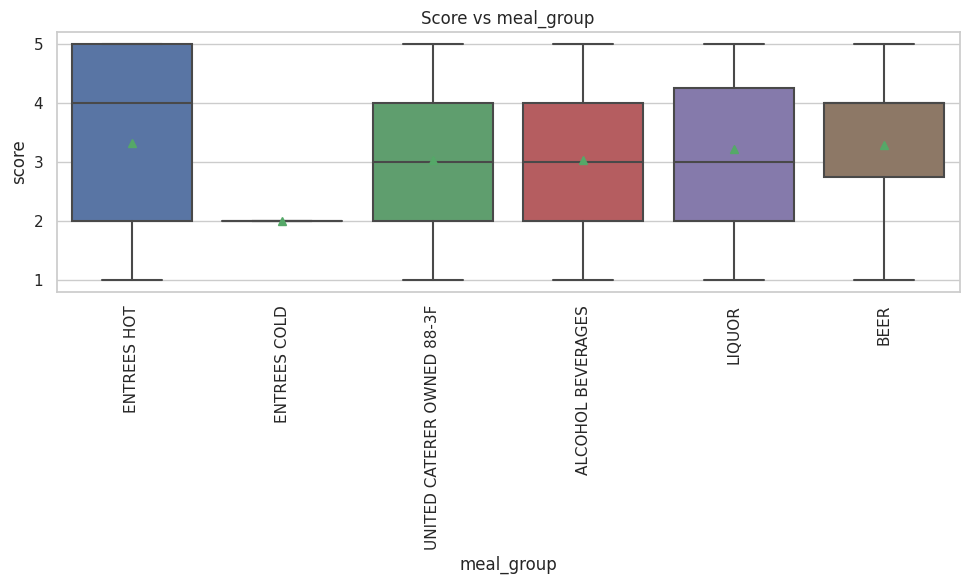

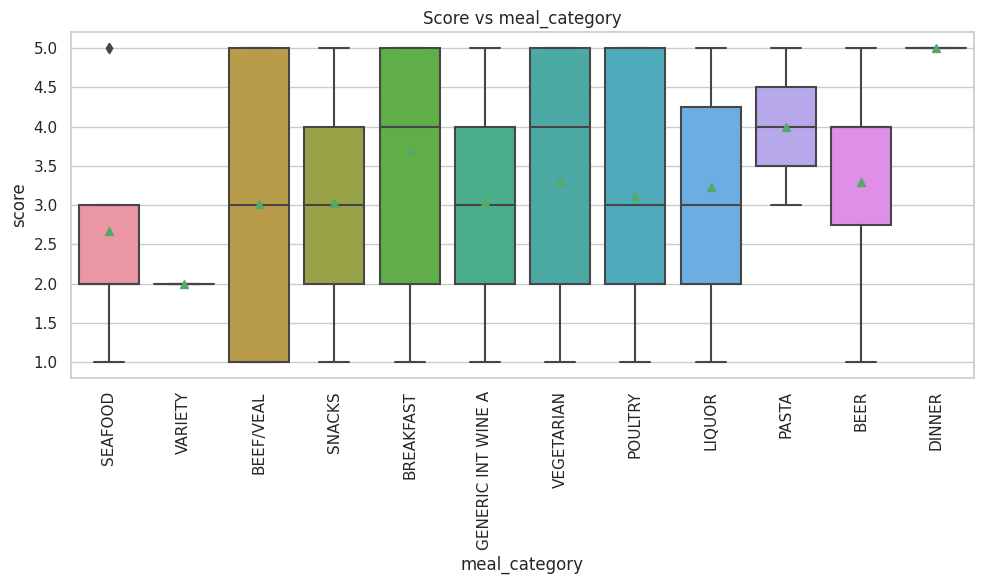

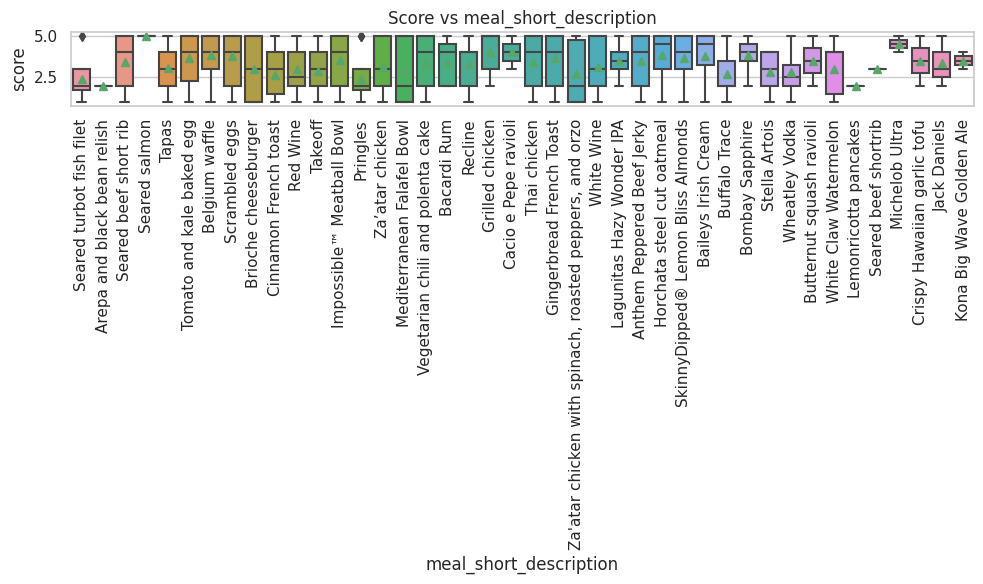

<ipython-input-203-7910a3e5e6dd>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


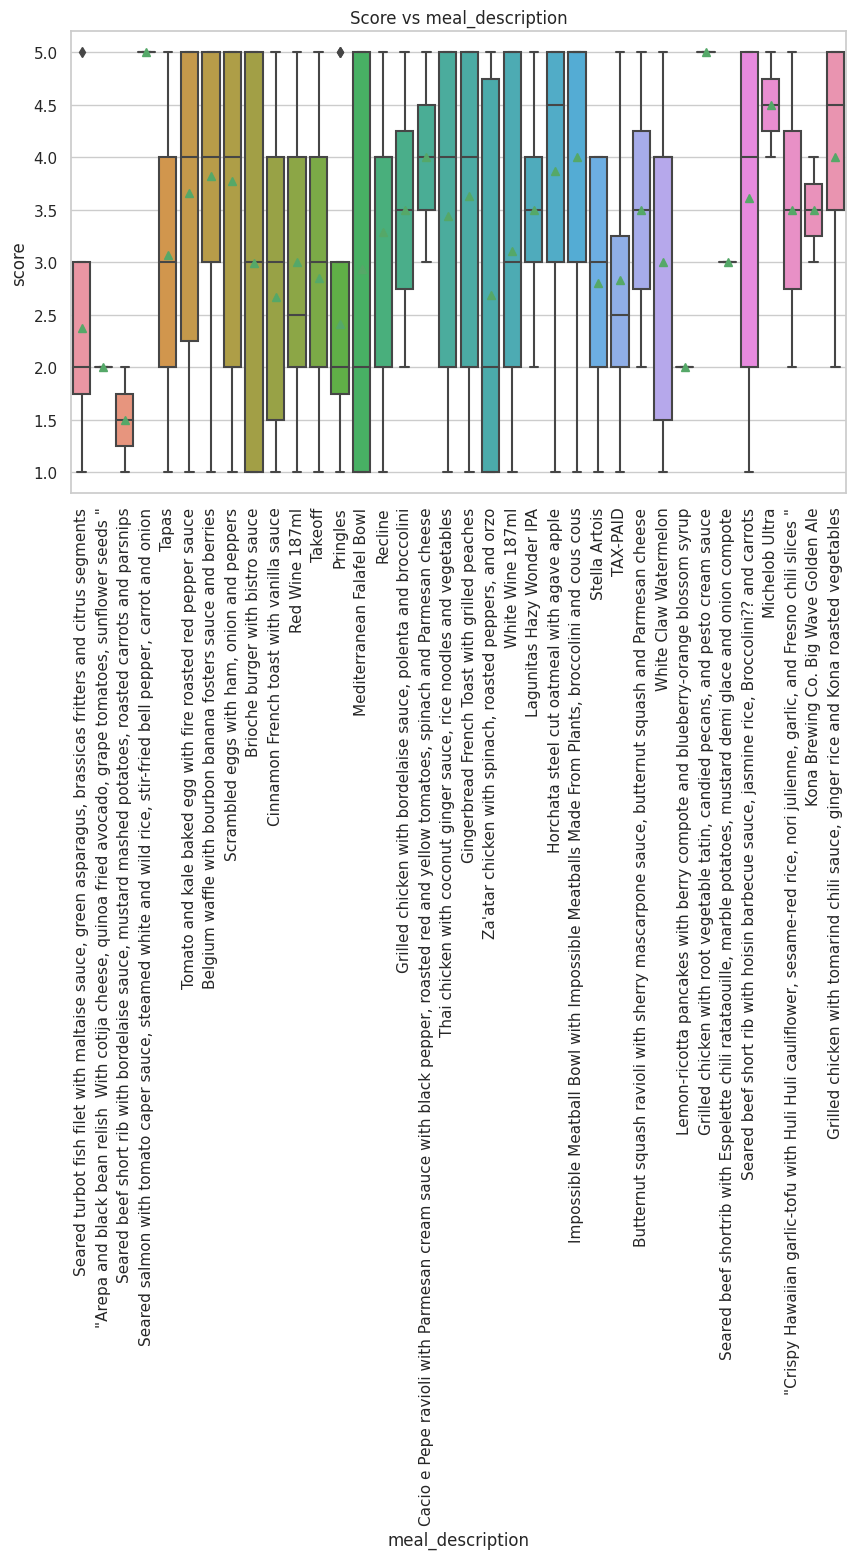

In [203]:
categorical_columns = ['meal_group', 'meal_category', 'meal_short_description', 'meal_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a bar plot of score vs. the categorical column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='score', data=df_hub, showmeans=True)
    plt.title(f"Score vs {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [204]:
df_hub_entree_hot = df_hub[df_hub['meal_group'] == 'ENTREES HOT']

In [205]:
df_hub_entree_hot['meal_category'].value_counts()

BREAKFAST     519
BEEF/VEAL     430
VEGETARIAN    308
POULTRY       280
SEAFOOD         9
PASTA           3
DINNER          1
Name: meal_category, dtype: int64

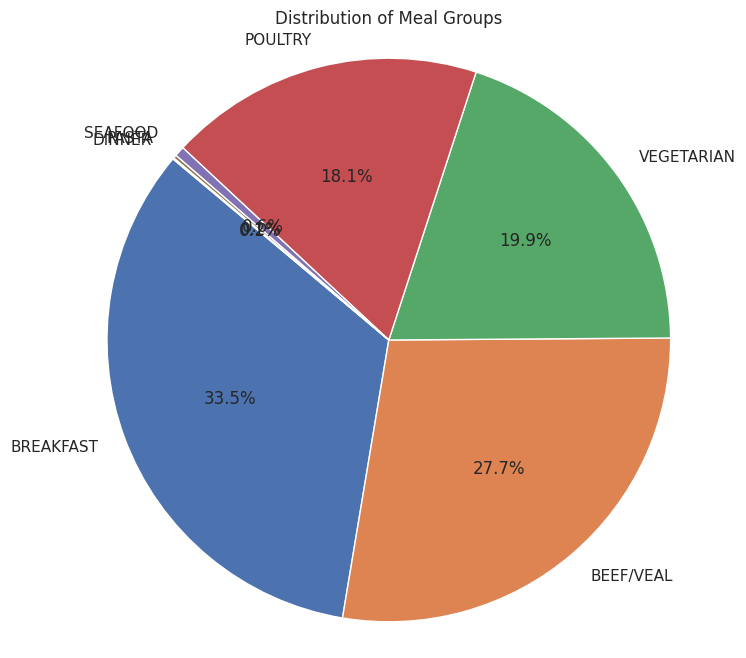

In [206]:
value_counts = df_hub_entree_hot['meal_category'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=140)
plt.title("Distribution of Meal Groups")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

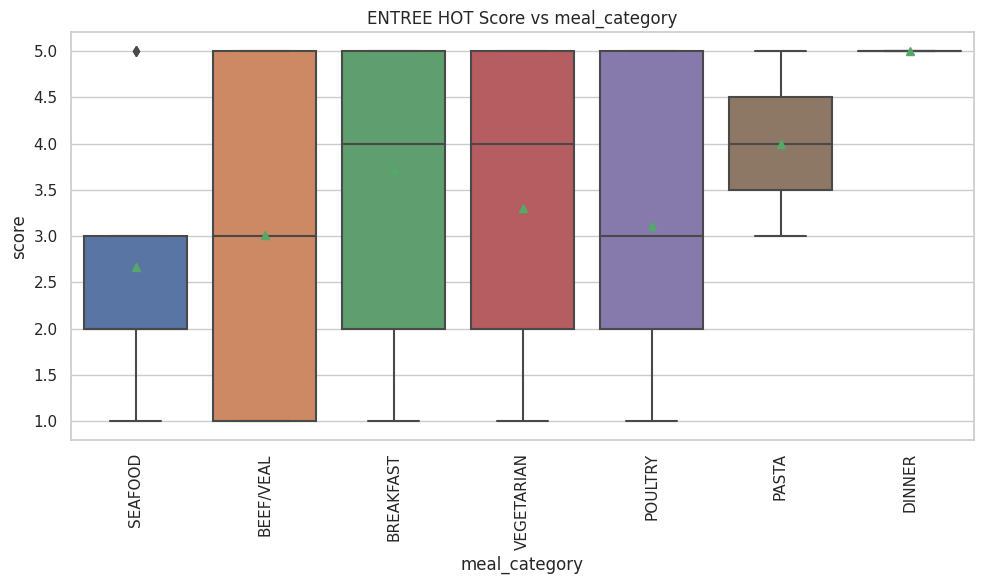

<ipython-input-207-b5de28382849>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


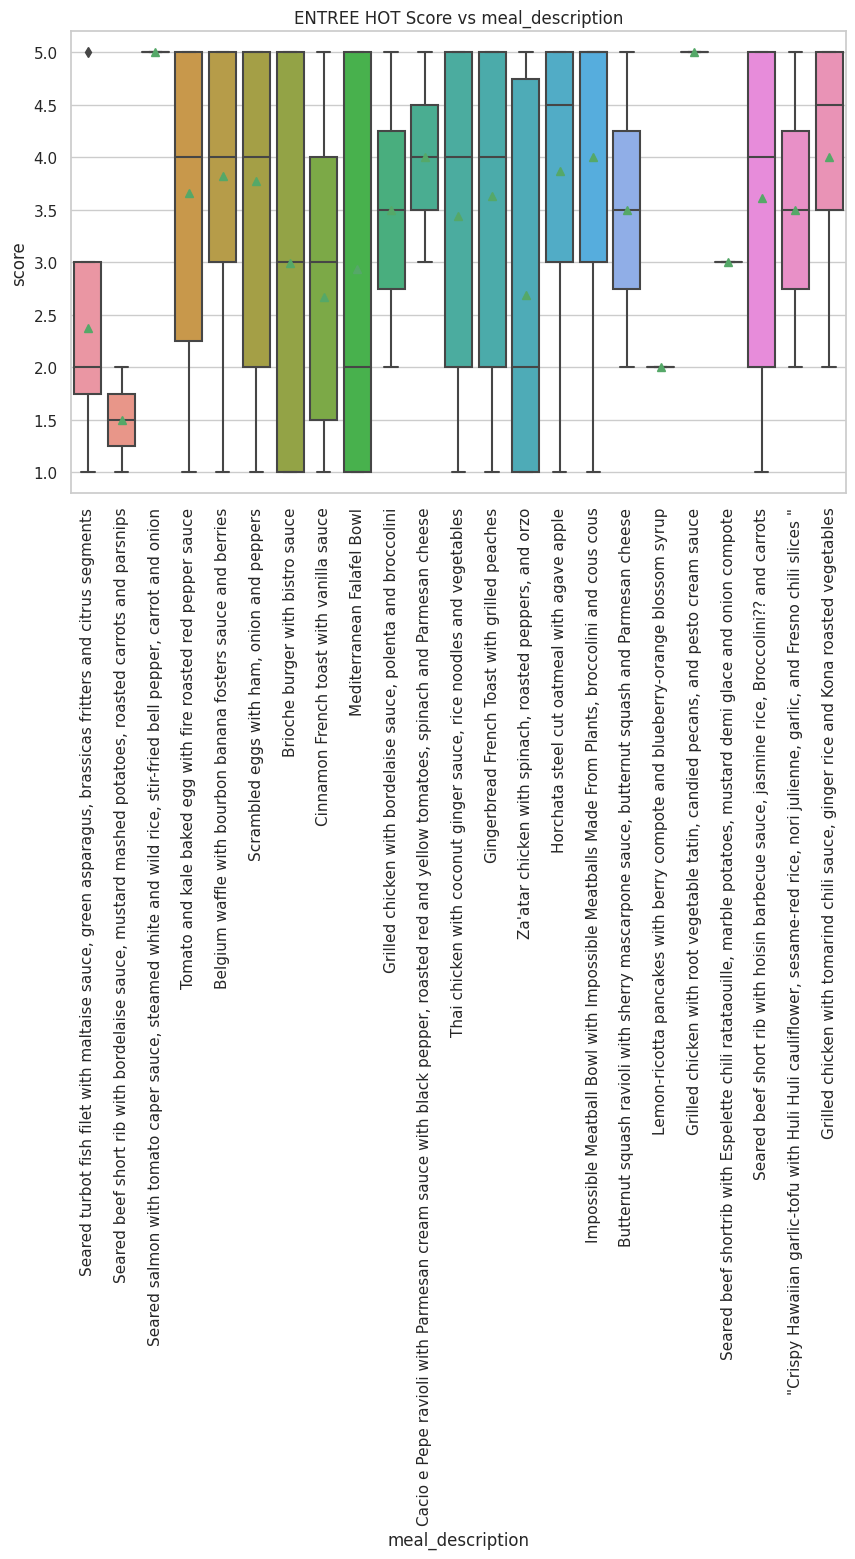

In [207]:
categorical_columns = ['meal_category', 'meal_short_description', 'meal_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a bar plot of score vs. the categorical column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='score', data=df_hub_entree_hot , showmeans=True)
    plt.title(f"ENTREE HOT Score vs {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [208]:
df_hub_entree_hot_beef = df_hub_entree_hot[df_hub_entree_hot['meal_category'] == 'BEEF/VEAL']

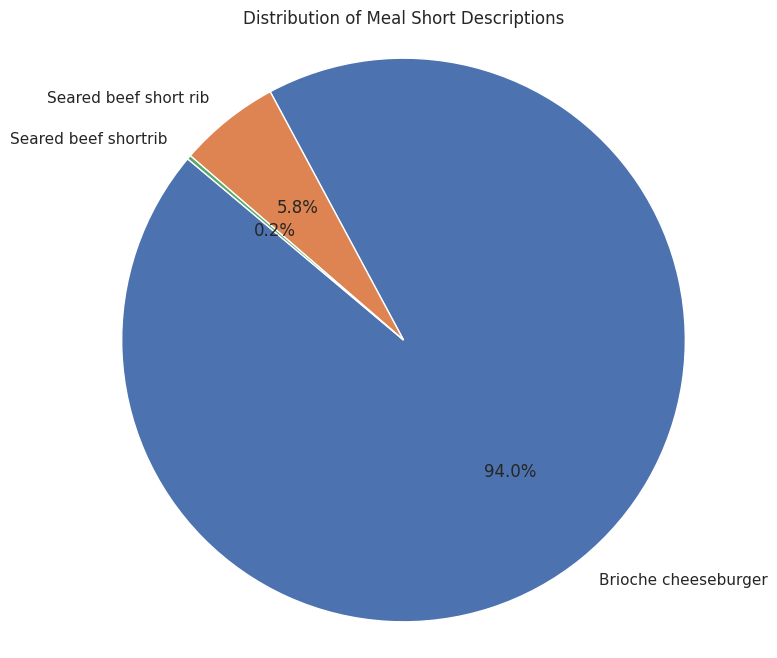

In [209]:
value_counts = df_hub_entree_hot_beef['meal_short_description'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=140)
plt.title("Distribution of Meal Short Descriptions")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

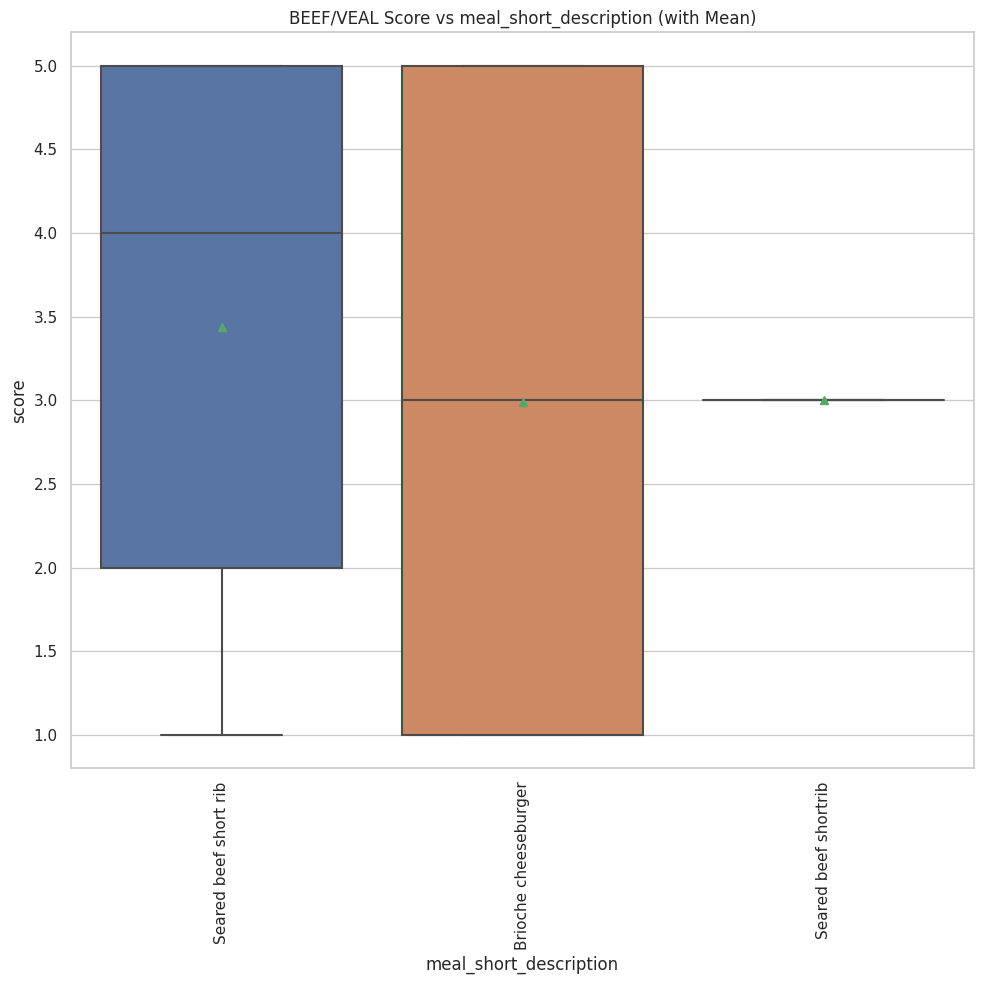

In [210]:
categorical_columns = ['meal_short_description']

# Loop through each categorical column
for column in categorical_columns:
    # Create a box plot of score vs. the categorical column with mean displayed
    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(x=column, y='score', data=df_hub_entree_hot_beef, showmeans=True)  # Set showmeans to True
    plt.title(f"BEEF/VEAL Score vs {column} (with Mean)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [211]:
df_hub_entree_brkfst = df_hub_entree_hot[df_hub_entree_hot['meal_category'] == 'BREAKFAST']

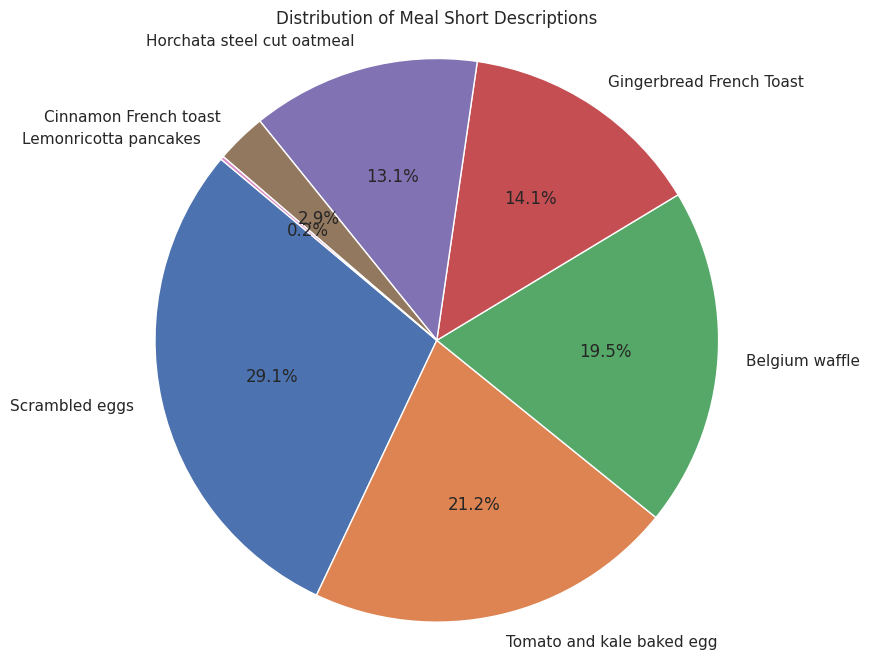

In [212]:
value_counts = df_hub_entree_brkfst['meal_short_description'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=140)
plt.title("Distribution of Meal Short Descriptions")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

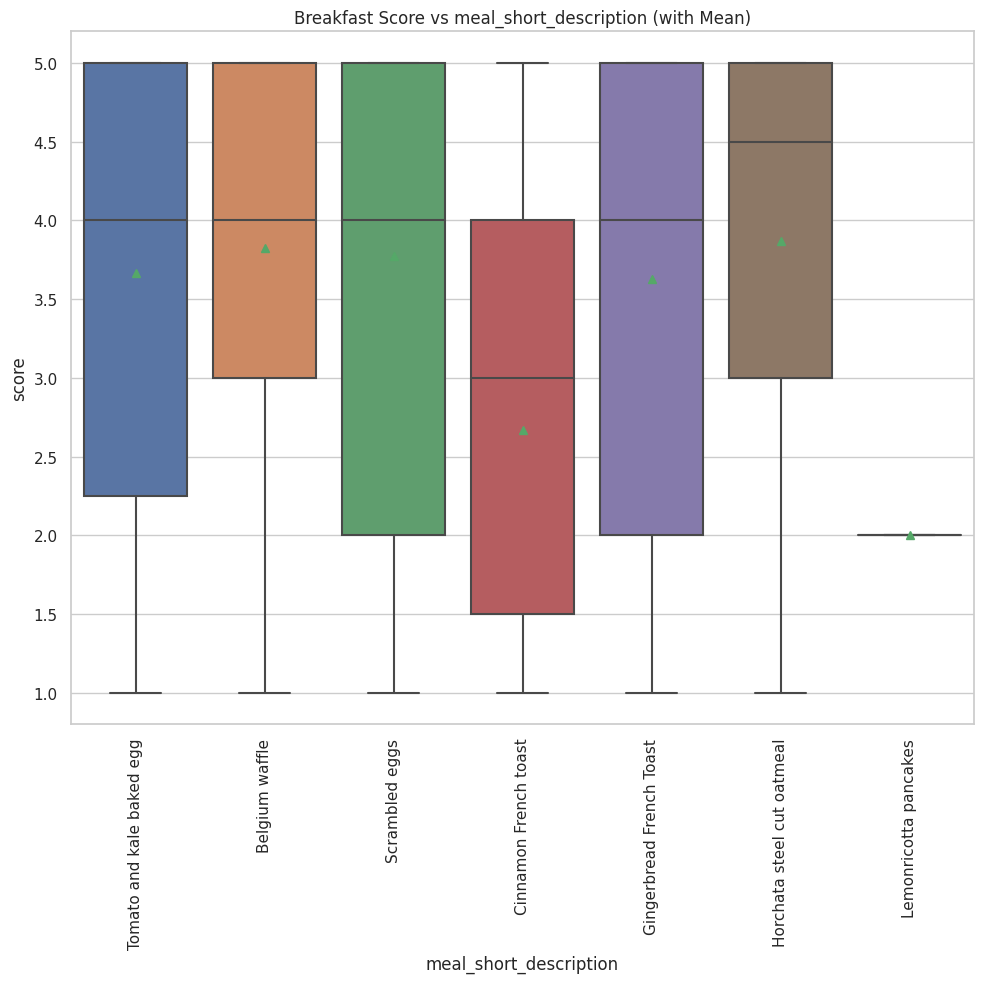

In [213]:
categorical_columns = ['meal_short_description']


for column in categorical_columns:

    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(x=column, y='score', data=df_hub_entree_brkfst, showmeans=True)
    plt.title(f"Breakfast Score vs {column} (with Mean)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [214]:
df_hub_entree_poultry = df_hub_entree_hot[df_hub_entree_hot['meal_category'] == 'POULTRY']

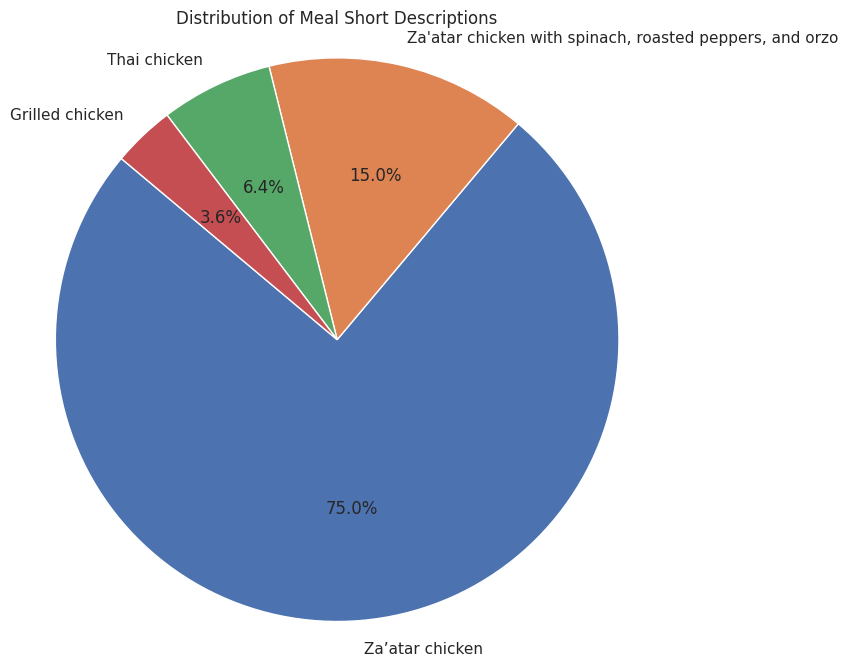

In [215]:
value_counts = df_hub_entree_poultry['meal_short_description'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=140)
plt.title("Distribution of Meal Short Descriptions")
plt.axis('equal')
plt.show()

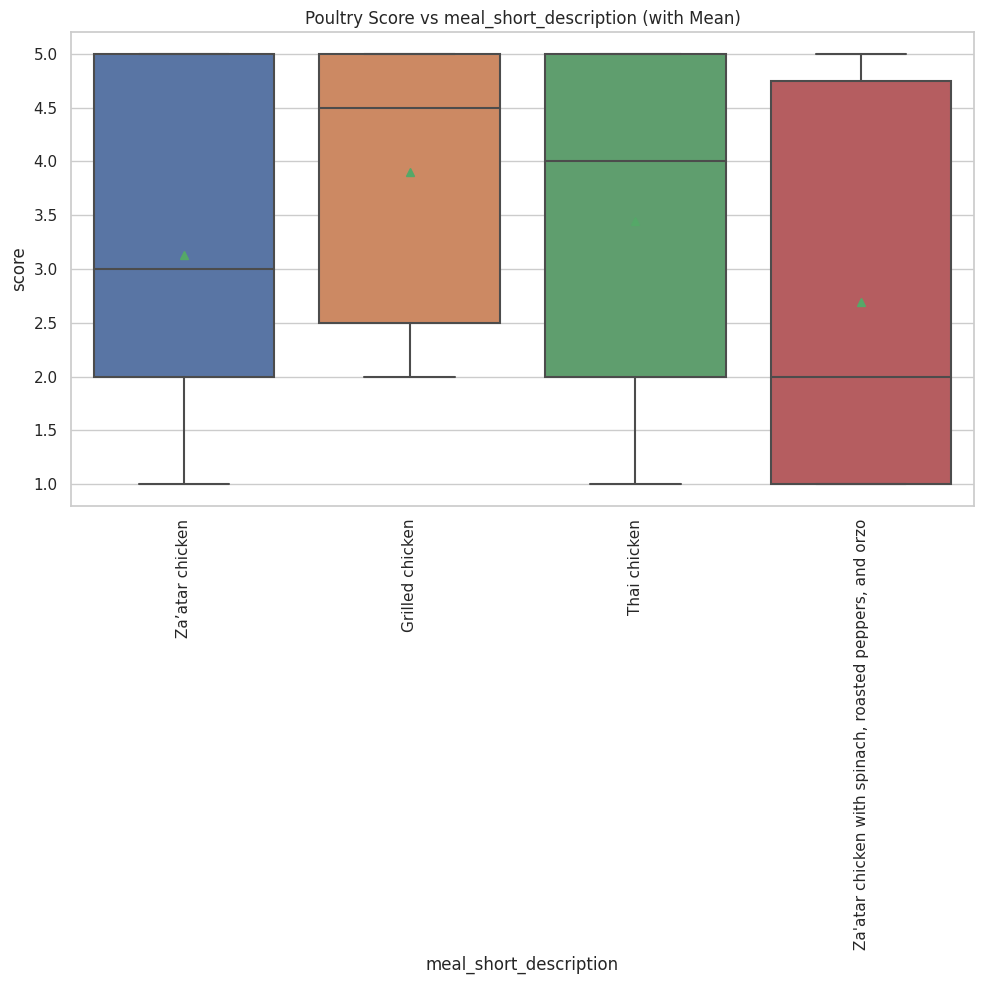

In [216]:
categorical_columns = ['meal_short_description']


for column in categorical_columns:

    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(x=column, y='score', data=df_hub_entree_poultry, showmeans=True)  # Set showmeans to True
    plt.title(f"Poultry Score vs {column} (with Mean)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [217]:
df_hub_entree_veg = df_hub_entree_hot[df_hub_entree_hot['meal_category'] == 'VEGETARIAN']

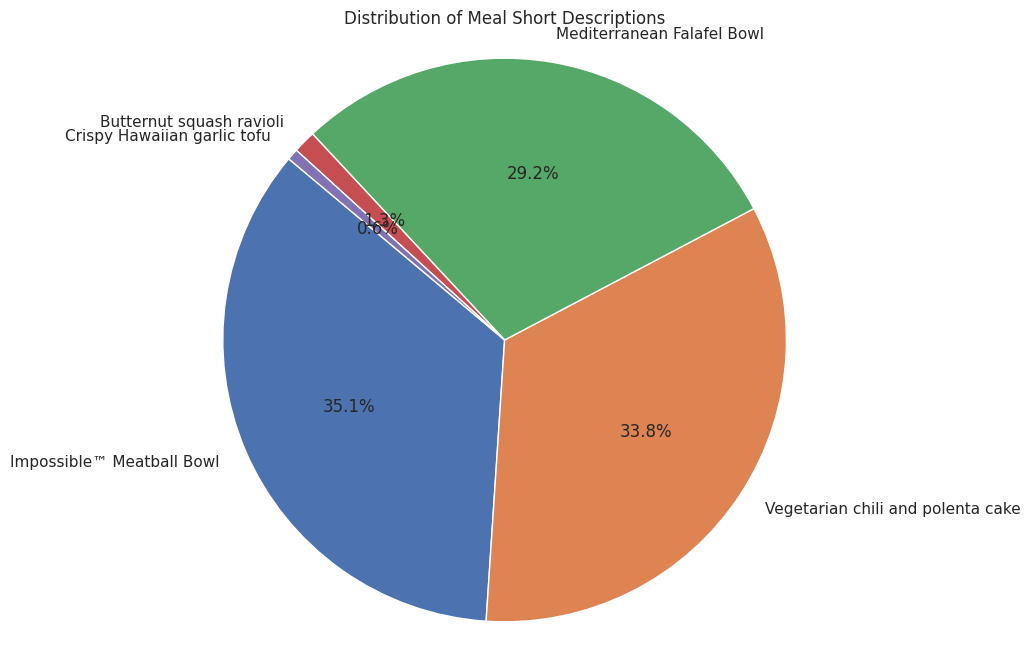

In [218]:
value_counts = df_hub_entree_veg['meal_short_description'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=140)
plt.title("Distribution of Meal Short Descriptions")
plt.axis('equal')
plt.show()

In [219]:
categorical_columns = ['meal_short_description']


for column in categorical_columns:

    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(x=column, y='score', data=df_hub_entree_veg, showmeans=True)  # Set showmeans to True
    plt.title(f"Vegetarian Score vs {column} (with Mean)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [220]:
df_hub_united = df_hub[df_hub['meal_group'] == 'UNITED CATERER OWNED 88-3F']

In [221]:
df_hub_united['meal_category'].value_counts()

SNACKS    237
Name: meal_category, dtype: int64

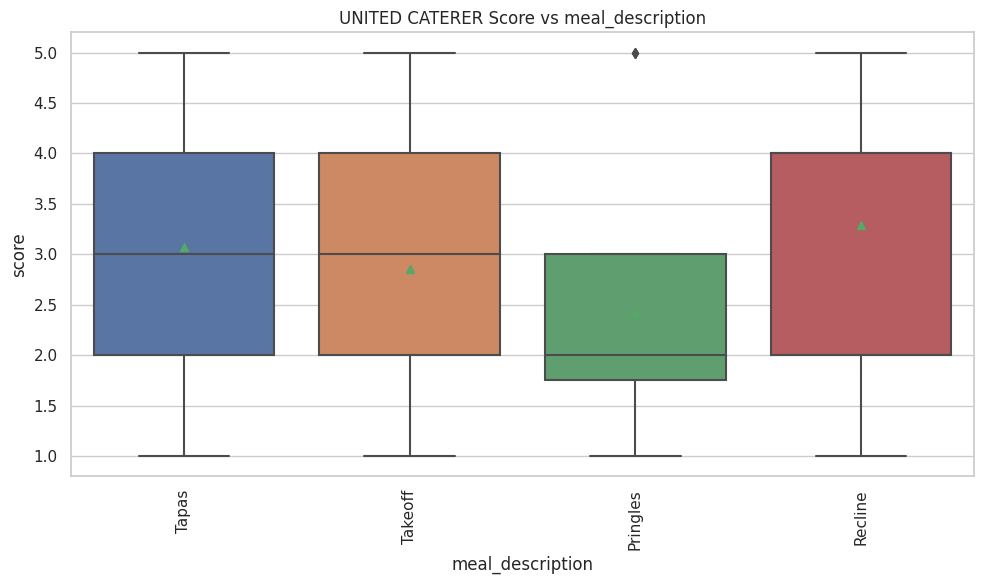

In [222]:
categorical_columns = ['meal_category', 'meal_short_description', 'meal_description']


for column in categorical_columns:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='score', data=df_hub_united , showmeans=True)
    plt.title(f"UNITED CATERER Score vs {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [223]:
df_hub_alchol = df_hub[df_hub['meal_group'] == 'ALCOHOL BEVERAGES']

In [224]:
df_hub_alchol['meal_category'].value_counts()

GENERIC INT WINE A    29
Name: meal_category, dtype: int64

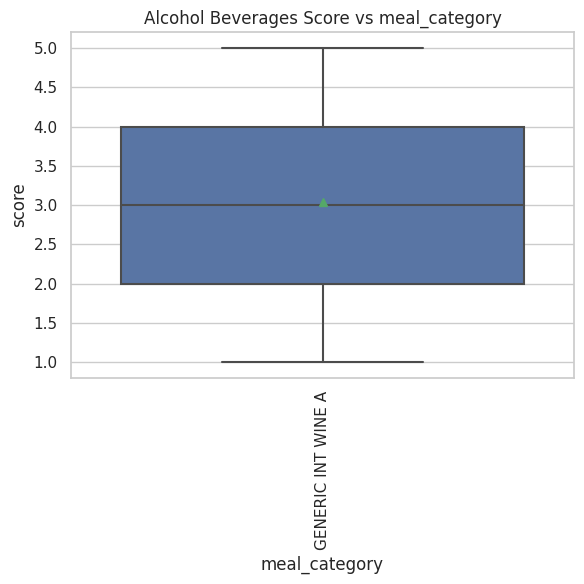

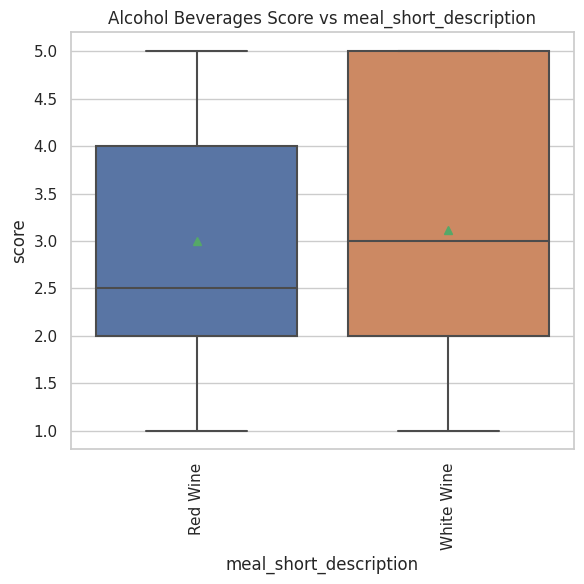

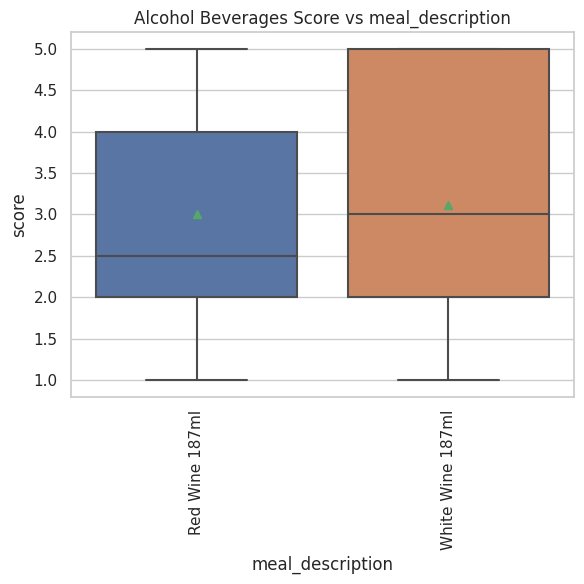

In [225]:
categorical_columns = ['meal_category', 'meal_short_description', 'meal_description']


for column in categorical_columns:

    plt.figure(figsize=(6, 6))
    sns.boxplot(x=column, y='score', data=df_hub_alchol, showmeans=True)
    plt.title(f"Alcohol Beverages Score vs {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

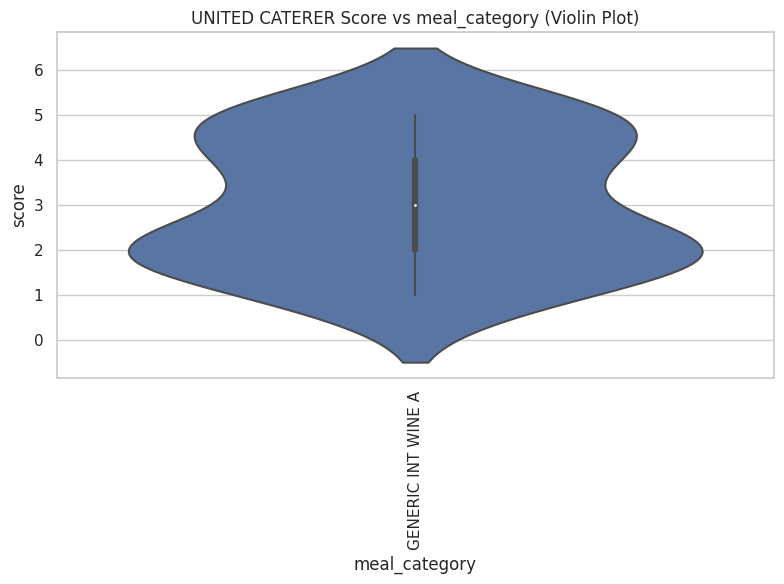

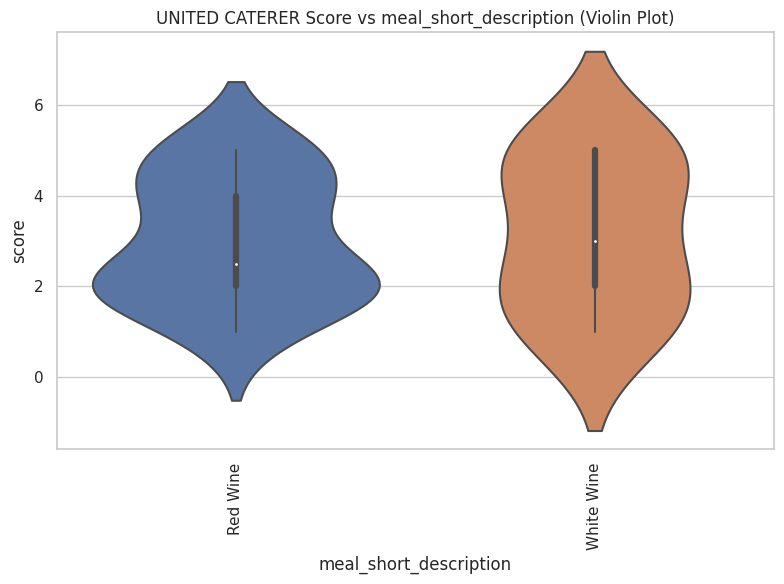

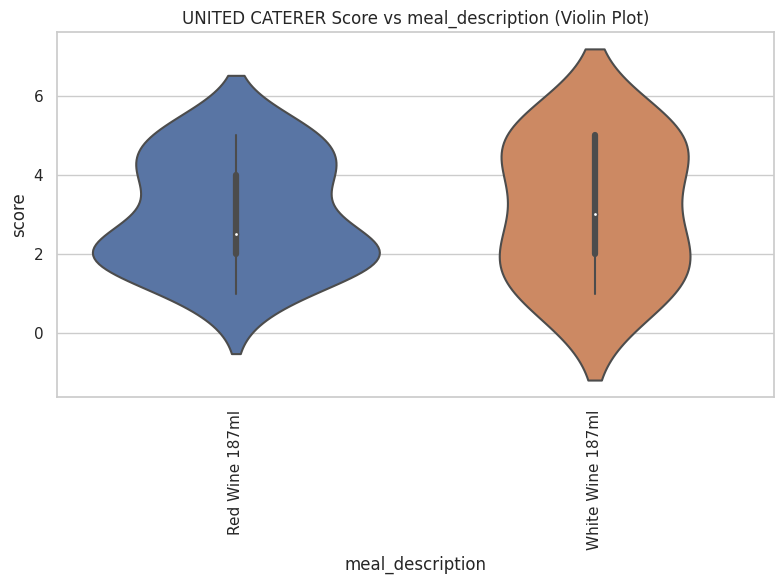

In [226]:
categorical_columns = ['meal_category', 'meal_short_description', 'meal_description']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=column, y='score', data=df_hub_alchol, showmeans=True)
    plt.title(f"UNITED CATERER Score vs {column} (Violin Plot)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

***ANALYSIS 2 - Ineventory Mangement***

In [ ]:
df_inventory = df1.copy()

In [ ]:
df_inventory_clean = df_inventory[(df_inventory['planned_entree_count'] >= 0) & (df_inventory['consumed_entree_count'] >= 0)]

In [ ]:
df_inventory_clean.info()

In [ ]:
df_inventory_clean['Difference'] = df_inventory_clean['consumed_entree_count'] - df_inventory_clean['planned_entree_count']

In [108]:
df_inventory_clean

flight_number departure_station_code arrival_station_code  \
0               2634                    IAX                  PDX   
1               2666                    ORX                  IAX   
2               2310                    DEX                  SAX   
3               1712                    SFX                  CLX   
4               1225                    LAX                  HNX   
...              ...                    ...                  ...   
61262            711                    ORX                  AUX   
61263           1914                    IAX                  LAX   
61264           1417                    IAX                  LAX   
61265           1005                    LAX                  ITX   
61266            583                    YYX                  SFX   

      scheduled_departure_dtl  entree_product_id  \
0                    9/1/2022              58019   
1                    9/1/2022              60549   
2                    9/2/2022              58981   
3                    9/4/2022              58764   
4                    9/8/2022              60549   
...                       ...                ...   
61262               9/20/2022              61524   
61263               9/30/2022              61360   
61264               9/23/2022              60987   
61265               9/30/2022              54759   
61266               9/20/2022              45351   

                      entree_description entree_code  planned_entree_count  \
0                         Belgium waffle          WF                    20   
1      Vegetarian chili and polenta cake           V                     3   
2                         Scrambled eggs           O                     9   
3             Mediterranean Falafel Bowl           V                     1   
4      Vegetarian chili and polenta cake           V                     1   
...                                  ...         ...                   ...   
61262                     Scrambled eggs           O                     6   
61263               Brioche cheeseburger           B                     3   
61264           Impossible Meatball Bowl           V                     6   
61265              Seared beef short rib           B                     6   
61266                   Teriyaki chicken           C                    10   

       consumed_entree_count  Difference  
0                         32          12  
1                          0          -3  
2                          7          -2  
3                          0          -1  
4                          0          -1  
...                      ...         ...  
61262                      5          -1  
61263                      0          -3  
61264                      5          -1  
61265                      0          -6  
61266                      6          -4  

[61206 rows x 10 columns]

In [111]:
subset_columns = ['flight_number', 'departure_station_code', 'arrival_station_code', 'scheduled_departure_dtl', 'entree_product_id']


df_inventory_clean.drop_duplicates(subset=subset_columns, inplace=True)

<ipython-input-111-2d7f5537e9b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inventory_clean.drop_duplicates(subset=subset_columns, inplace=True)


In [113]:
df_inventory_clean['entree_description'].nunique()

102

In [114]:
grouped_avg_difference = df_inventory_clean.groupby(['entree_description'])['Difference'].mean()

grouped_avg_difference = pd.DataFrame(grouped_avg_difference)



In [115]:
grouped_avg_difference.reset_index(inplace = True)

In [116]:
grouped_avg_difference

entree_description  Difference
0                    ASIAN VEGETARIAN MEAL   -0.651163
1              Arepa and black bean relish   -2.000000
2                              Bangus fish  -55.000000
3    Beef and onion stew in red wine sauce  -83.000000
4                              Beef burger   -3.333333
..                                     ...         ...
97   Tomato, basil and mozzarella sandwich  -21.500000
98       Vegetarian chili and polenta cake   -1.314995
99                       Vegetarian entree   -2.943810
100                          Zatar chicken   -5.956814
101                   Zatar chicken entree   -3.666667

[102 rows x 2 columns]

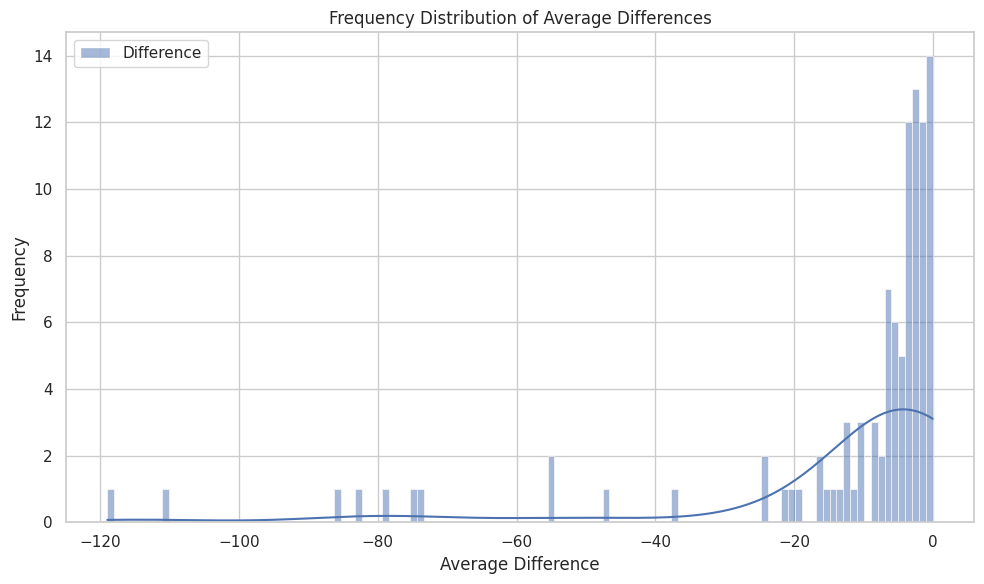

In [117]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(grouped_avg_difference, bins=120, kde=True)
plt.title("Frequency Distribution of Average Differences")
plt.xlabel("Average Difference")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

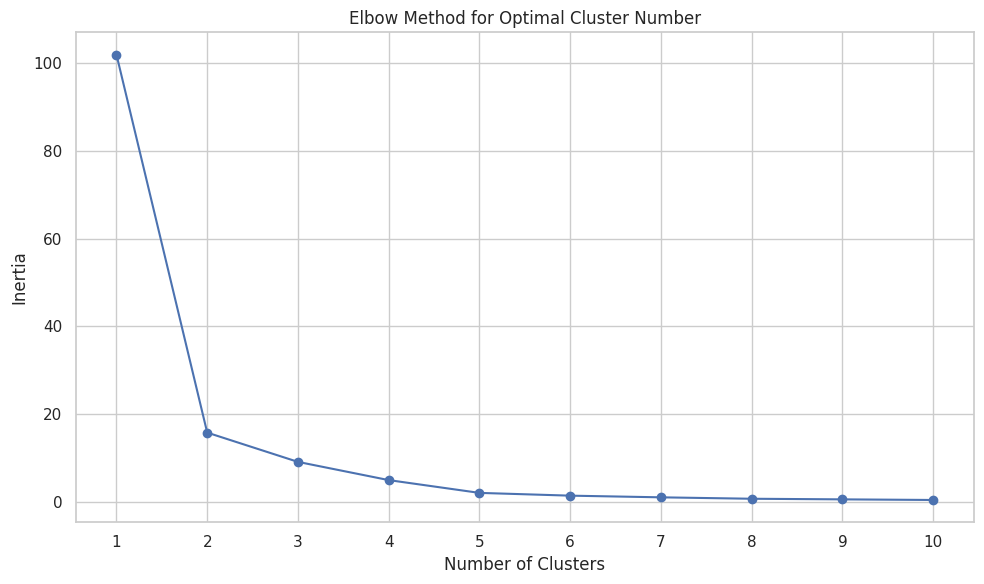

In [118]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




data = pd.DataFrame(grouped_avg_difference, columns=['Difference'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Calculate inertia (within-cluster sum of squares) for different cluster sizes
inertia_values = []
for k in range(1, 11):  # Trying cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11))
plt.tight_layout()
plt.show()

In [119]:
data = pd.DataFrame(grouped_avg_difference, columns=['Difference'])


kmeans = KMeans(n_clusters=2, random_state=0)
data['Cluster'] = kmeans.fit_predict(data)


grouped_avg_difference['Cluster'] = data['Cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [120]:
grouped_avg_difference

entree_description  Difference  Cluster
0                    ASIAN VEGETARIAN MEAL   -0.651163        0
1              Arepa and black bean relish   -2.000000        0
2                              Bangus fish  -55.000000        1
3    Beef and onion stew in red wine sauce  -83.000000        1
4                              Beef burger   -3.333333        0
..                                     ...         ...      ...
97   Tomato, basil and mozzarella sandwich  -21.500000        0
98       Vegetarian chili and polenta cake   -1.314995        0
99                       Vegetarian entree   -2.943810        0
100                          Zatar chicken   -5.956814        0
101                   Zatar chicken entree   -3.666667        0

[102 rows x 3 columns]

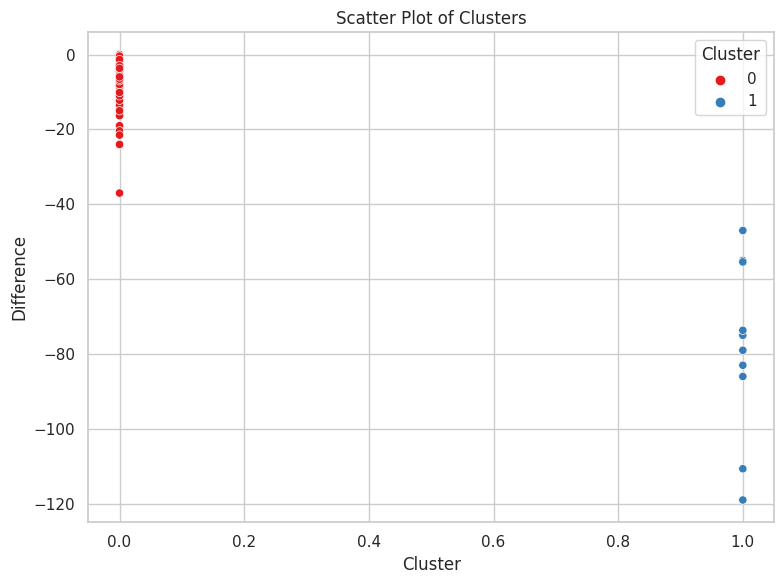

In [121]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Cluster', y='Difference', hue='Cluster', palette='Set1')
plt.title('Scatter Plot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Difference')
plt.legend().set_title('Cluster')
plt.tight_layout()
plt.show()

In [122]:
grouped_avg_difference.groupby('Cluster')['Difference'].mean()

Cluster
0    -5.758442
1   -78.373333
Name: Difference, dtype: float64

In [123]:
grouped_avg_difference.groupby('Cluster').count()

entree_description  Difference
Cluster                                
0                        92          92
1                        10          10

In [124]:
subset_cluster_1 = grouped_avg_difference[grouped_avg_difference['Cluster'] == 1]
subset_cluster_1

entree_description  Difference  Cluster
2                                         Bangus fish  -55.000000        1
3               Beef and onion stew in red wine sauce  -83.000000        1
14                    Carved roasted chicken sandwich  -86.000000        1
20                             Chicken quinoa skillet -119.000000        1
33  ENT, CARVED ROASTED CHICKEN ON ITALIAN FLATBRE...  -75.000000        1
36  ENT, GUAVA EGG NOODLE SALAD WITH TOFU, ROASTED...  -73.666667        1
37  ENT, HAWAIIAN QUINOA SALAD WITH GRILLED CHICKE... -110.666667        1
38          ENT, PIRI PIRI CHICKEN, UE, EUROPE to USA  -47.000000        1
45                                         Fried rice  -55.400000        1
85                           Seven vegetable stir-fry  -79.000000        1

***ANALYSIS 3 - Customer Comments***

In [136]:
df_comments = df3.copy()

In [137]:
df_comments.drop_duplicates(inplace=True)

In [138]:
df_comments['verbatim_text'] = df_comments['verbatim_text'].str.lower()

df_comments = df_comments[df_comments['verbatim_text'].str.split().apply(len) >= 3]

In [133]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7709 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   flight_number             7709 non-null   int64  
 1   origin_station_code       7709 non-null   object 
 2   destination_station_code  7709 non-null   object 
 3   scheduled_departure_date  7709 non-null   object 
 4   arrival_delay_group       7709 non-null   object 
 5   departure_delay_group     7709 non-null   object 
 6   entity                    7709 non-null   object 
 7   verbatim_text             7709 non-null   object 
 8   seat_factor_band          7709 non-null   object 
 9   ques_verbatim_text        7709 non-null   object 
 10  loyalty_program_level     5870 non-null   object 
 11  fleet_type_description    7709 non-null   object 
 12  fleet_usage               7709 non-null   object 
 13  response_group            7709 non-null   object 
 14  tokens  

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from gensim import corpora, models
import re

# Assuming you have a DataFrame named df3

# Download NLTK resources (if not already done)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

In [ ]:
df_comments[['verbatim_text', 'sentiment', 'cleaned_tokens']]

In [141]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification




model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Preprocess text and analyze sentiment
def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1)
    return predicted_class.item()

# Apply sentiment analysis function to the DataFrame
df_comments['sentiment'] = df_comments['verbatim_text'].apply(analyze_sentiment)

# Display the DataFrame with sentiment predictions
print(df_comments[['verbatim_text', 'sentiment']])

                                          verbatim_text  sentiment
0     there was no salad dressing. the staff informe...          0
1                                         not a choice.          0
2                       more variety and bigger snacks.          4
3     serving pretzels and cookies in first class wa...          1
4     more inflight selections to purchase for full ...          3
...                                                 ...        ...
9417  salad with evening meal was far too spicy (fro...          2
9419  tapas box needs better pita chips. the provide...          1
9420  my flight attendant missed my drink order 2x a...          0
9422  without a smartphone, not much to eat. we pack...          0
9423        offering coffee or tea would also be great.          2

[7709 rows x 2 columns]


In [142]:
df_comments[['verbatim_text', 'sentiment']]

verbatim_text  sentiment
0     there was no salad dressing. the staff informe...          0
1                                         not a choice.          0
2                       more variety and bigger snacks.          4
3     serving pretzels and cookies in first class wa...          1
4     more inflight selections to purchase for full ...          3
...                                                 ...        ...
9417  salad with evening meal was far too spicy (fro...          2
9419  tapas box needs better pita chips. the provide...          1
9420  my flight attendant missed my drink order 2x a...          0
9422  without a smartphone, not much to eat. we pack...          0
9423        offering coffee or tea would also be great.          2

[7709 rows x 2 columns]

In [145]:
sentiment_mapping = {
    0: 'Very Negative',
    1: 'Negative',
    2: 'Neutral',
    3: 'Positive',
    4: 'Very Positive'
}

# Create a new column 'sentiment_meaning' by mapping numerical values
df_comments['sentiment_meaning'] = df_comments['sentiment'].map(sentiment_mapping)

In [146]:
df_comments.head()

flight_number origin_station_code destination_station_code  \
0            950                 LHX                      SFX   
1            950                 LHX                      SFX   
2           1876                 FLX                      EWX   
3           5469                 SFX                      SEX   
4            281                 DEX                      ANX   

  scheduled_departure_date arrival_delay_group departure_delay_group  \
0               2022-09-01      Early & Ontime               Delayed   
1               2022-09-01      Early & Ontime               Delayed   
2               2022-09-01      Early & Ontime        Early & Ontime   
3               2022-09-01      Early & Ontime        Early & Ontime   
4               2022-09-01      Early & Ontime        Early & Ontime   

     entity                                      verbatim_text  \
0  Atlantic  there was no salad dressing. the staff informe...   
1  Atlantic                                      not a choice.   
2  Domestic                    more variety and bigger snacks.   
3  Domestic  serving pretzels and cookies in first class wa...   
4  Domestic  more inflight selections to purchase for full ...   

  seat_factor_band                                 ques_verbatim_text  \
0          0 to 70  Is there anything else you'd like to share abo...   
1          0 to 70  Is there anything else you'd like to share abo...   
2              90+  Is there anything else you'd like to share abo...   
3              90+  Is there anything else you'd like to share abo...   
4          0 to 70  Is there anything else you'd like to share abo...   

  loyalty_program_level fleet_type_description fleet_usage response_group  \
0             non-elite               B777-200    Mainline         member   
1                   NaN               B777-200    Mainline     non-member   
2             non-elite               A320-200    Mainline         member   
3          premier gold                ERJ-175     Express         member   
4             non-elite              B737-MAX8    Mainline         member   

   sentiment sentiment_meaning  
0          0     Very Negative  
1          0     Very Negative  
2          4     Very Positive  
3          1          Negative  
4          3          Positive

In [147]:
df_comments.describe(include = 'all')

flight_number origin_station_code destination_station_code  \
count     7709.000000                7709                     7709   
unique            NaN                 190                      184   
top               NaN                 IAX                      IAX   
freq              NaN                 902                     1139   
mean      1696.162148                 NaN                      NaN   
std       1524.291075                 NaN                      NaN   
min          2.000000                 NaN                      NaN   
25%        587.000000                 NaN                      NaN   
50%       1250.000000                 NaN                      NaN   
75%       2216.000000                 NaN                      NaN   
max       6375.000000                 NaN                      NaN   

       scheduled_departure_date arrival_delay_group departure_delay_group  \
count                      7709                7709                  7709   
unique                       30                   2                     2   
top                  2022-09-10      Early & Ontime        Early & Ontime   
freq                        330                5548                  5057   
mean                        NaN                 NaN                   NaN   
std                         NaN                 NaN                   NaN   
min                         NaN                 NaN                   NaN   
25%                         NaN                 NaN                   NaN   
50%                         NaN                 NaN                   NaN   
75%                         NaN                 NaN                   NaN   
max                         NaN                 NaN                   NaN   

          entity  verbatim_text seat_factor_band  \
count       7709           7709             7709   
unique         4           7601                4   
top     Domestic  no thank you.              90+   
freq        5312              9             5126   
mean         NaN            NaN              NaN   
std          NaN            NaN              NaN   
min          NaN            NaN              NaN   
25%          NaN            NaN              NaN   
50%          NaN            NaN              NaN   
75%          NaN            NaN              NaN   
max          NaN            NaN              NaN   

                                       ques_verbatim_text  \
count                                                7709   
unique                                                  1   
top     Is there anything else you'd like to share abo...   
freq                                                 7709   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

       loyalty_program_level fleet_type_description fleet_usage  \
count                   5870                   7709        7709   
unique                     7                     22           2   
top                non-elite               B737-900    Mainline   
freq                    3378                   1134        6600   
mean                     NaN                    NaN         NaN   
std                      NaN                    NaN         NaN   
min                      NaN                    NaN         NaN   
25%                      NaN                    NaN         NaN   
50%                      NaN                    NaN         NaN   
75%                      NaN                    NaN         NaN   
max                      NaN                    NaN         NaN   

       response_group    sentiment sentiment_meaning  
count            7709  7

In [144]:
df_comments['sentiment'].value_counts()

2    2530
1    1846
0    1364
4     993
3     976
Name: sentiment, dtype: int64

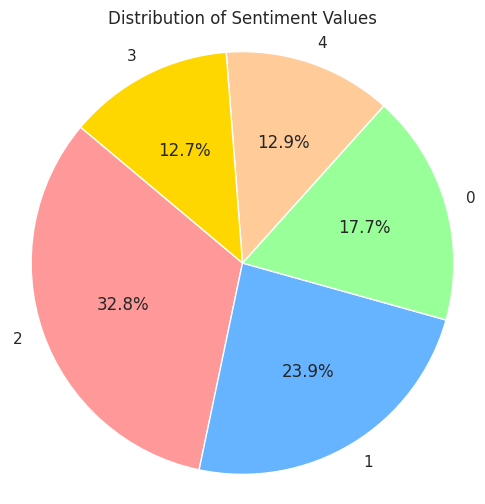

In [152]:
sentiment_counts = df_comments['sentiment'].value_counts()
custom_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Distribution of Sentiment Values')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

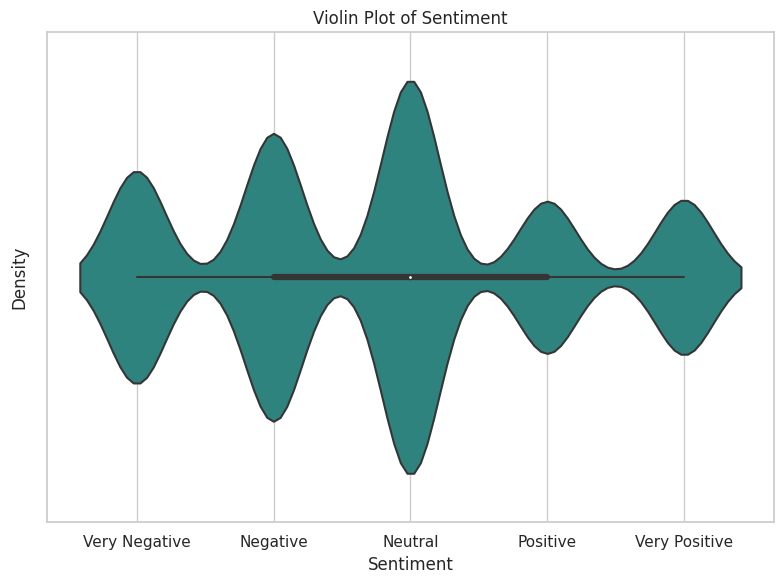

In [148]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='sentiment', data=df_comments, palette='viridis')
plt.title('Violin Plot of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Density')
plt.xticks(range(5), ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])
plt.tight_layout()
plt.show()

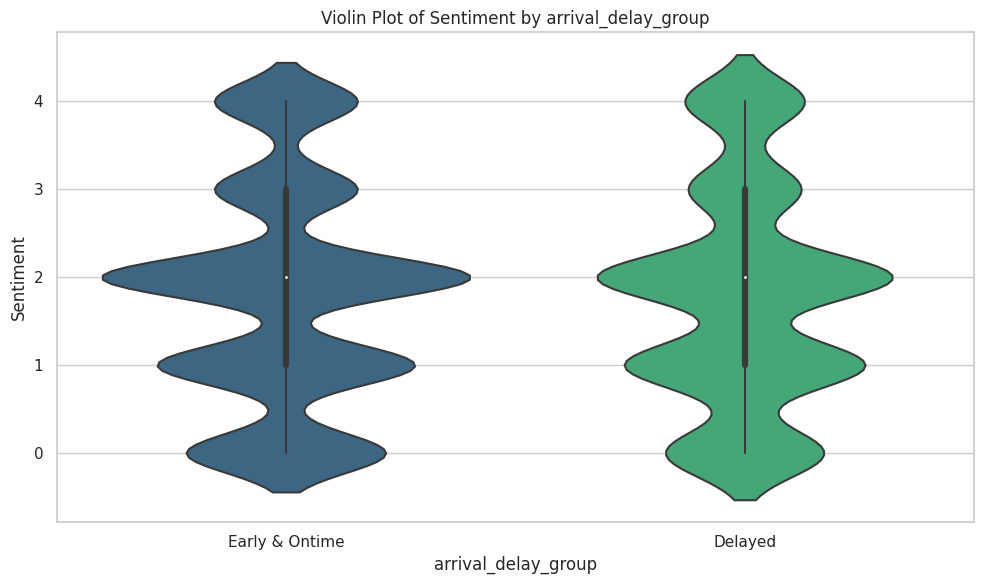

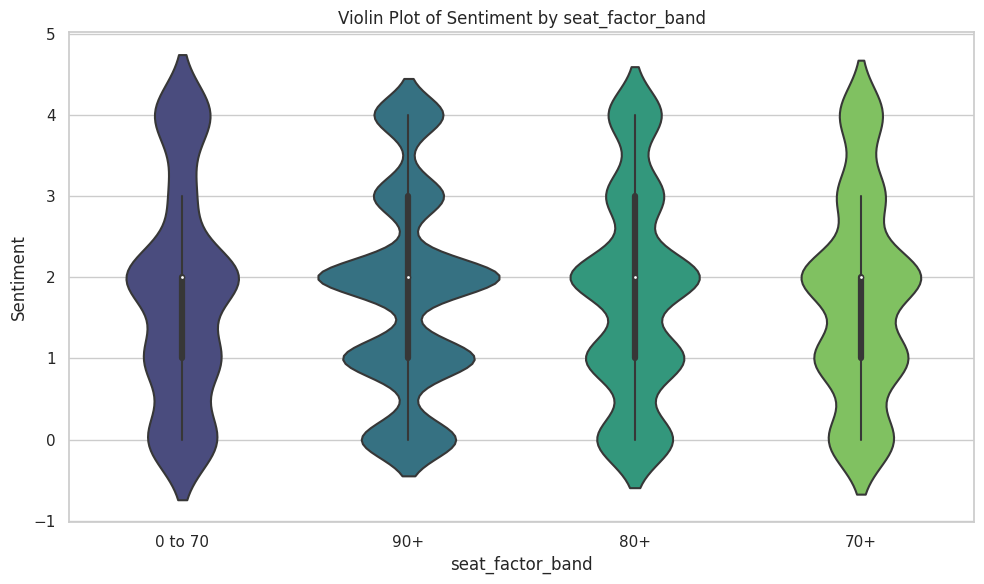

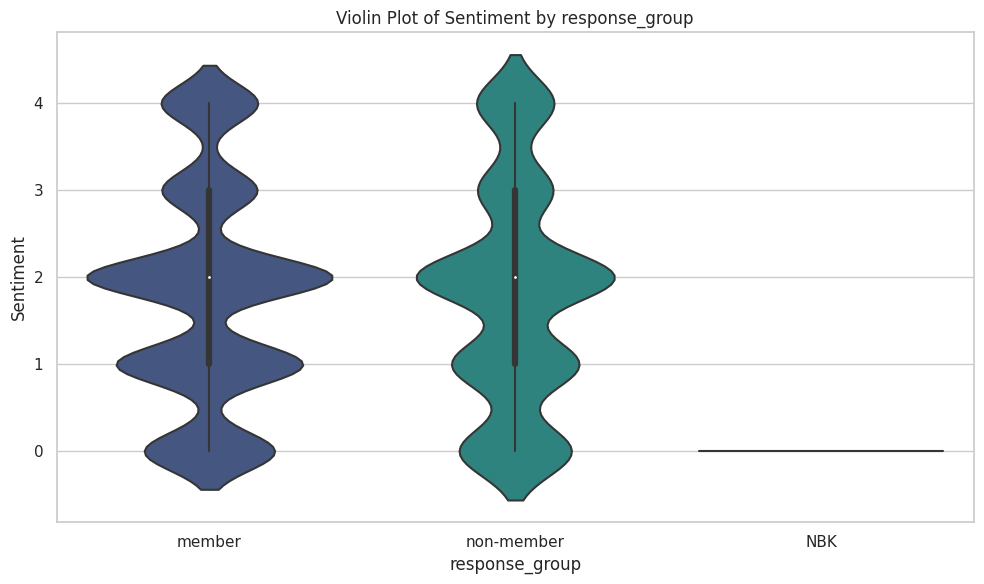

In [150]:
categorical_columns = ['arrival_delay_group', 'seat_factor_band', 'response_group']

# Loop through each categorical column and create violin plots
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=column, y='sentiment', data=df_comments, palette='viridis')
    plt.title(f'Violin Plot of Sentiment by {column}')
    plt.xlabel(column)
    plt.ylabel('Sentiment')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()